**Project Name**    -
###  ***Seoul Bike Sharing Demand Price Prediction***

In [3]:

%%html
<marquee style='width:100%; color: red;'><b> <h1 style="color:red;font-family:verdana;">Seoul Bike Sharing Demand Prediction </h1></b></marquee>


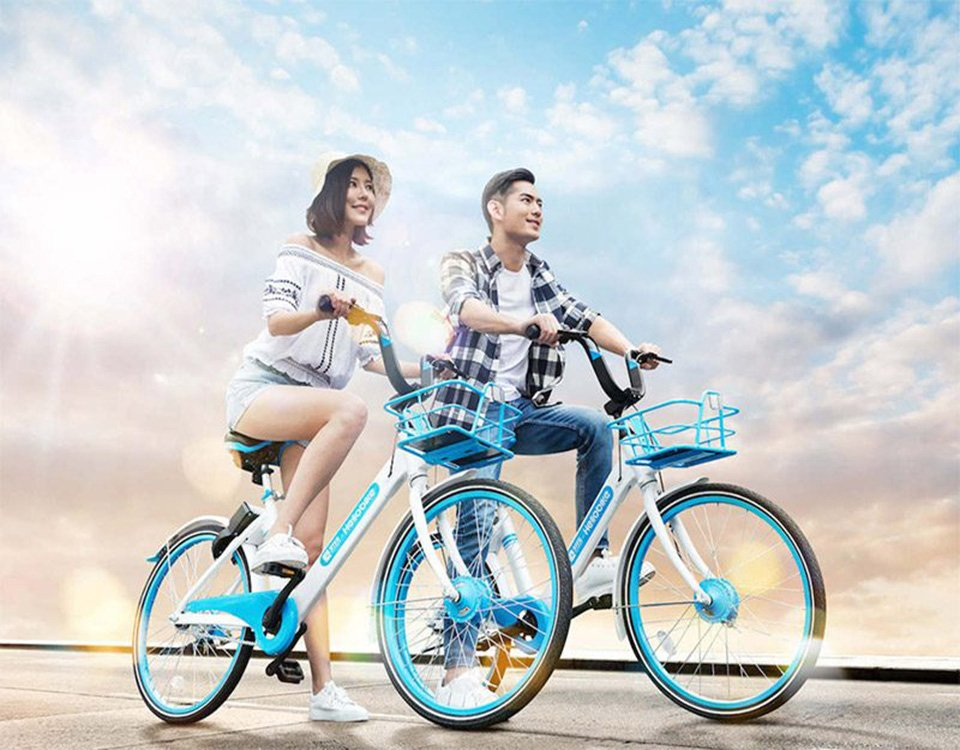

# **Project Type**    - **Regression** 
# **Contribution**    - **Individual**
#  **Performed by -**  ***Varun choubey***


## **Project Summary -**



Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. Bike sharing has been popular in many countries, due to the fact that environmental proception organizations proposed environmental sustainability transportation methods such as electric vehicles and bicycles . It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.


The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays. In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model then be tested and evaluated using metrics such as mean squared error and r-squared values. The actual data is from the Seoul city government's open data portal

So, our main goal was to achieve an accuracy of at least 85% in the bike demand predictions, which would help the city's bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time. We have performed lots of regression algorithms like linear regression, random forest, decision tree, gradient boosting  also we tried to do hyperparameter tuning and cross validation to improve the accuracy of the model. And finally we have decided to select  gradient boosting algorithm because it gave us high accuracy around 91% and 90% on train and test data resp.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation systems.

The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

1)Date : year-month-day

2)Rented Bike count - Count of bikes rented at each hour

3)Hour - Hour of he day

4)Temperature-Temperature in Celsius

5)Humidity - %

6)Windspeed - m/s

7)Visibility - 10m

8)Dew point temperature - Celsius

9)Solar radiation - MJ/m2

10)Rainfall - mm

11)Snowfall - cm

12)Seasons - Winter, Spring, Summer, Autumn

13)Holiday - Holiday/No holiday

14)Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Problem Statement**


We are going to Predict how the conditions, affect the no. of bike rented.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
#imported different libraries where we will be working with.

### Dataset Loading

In [5]:

# Load Dataset

from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
df=pd.read_csv("C:/Users/91913/Downloads/SeoulBikeData.csv",encoding='unicode_escape')

### Dataset First View

In [10]:
# Dataset First Look
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
df.shape


(8760, 14)

### Dataset Information

In [12]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### ***Breakdown of Our Features:***

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: *Season of the year, type : str, there are only 4 season's in data *.

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str


we can see that :
*One feature is in Date type.

*Four Features are in integer data type.

*Six Features are in float data type.

*Four Features are in object data type.

*Three features are in string data type.


#### Duplicate Values

In [13]:
# Dataset Duplicate Value counts
df[df.duplicated()].sum()


Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

As we can see that there are no duplicates present in any of the columns.

#### Missing Values/Null Values

In [14]:

# Missing Values/Null Values Count

df[df.isnull()].sum()

Date                           0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                        0
Holiday                        0
Functioning Day                0
dtype: object

### What did you know about your dataset?

Clearly, there are no duplicate or missing values present in the dataset containing data of 8760 rows and 14 columns.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [16]:
# Dataset Describe
dsc=df.describe().style.background_gradient()
dsc


### Variables Description 


**Measures of Frequency**


---



*   Count and Percent are those that we use to measure the frequency.


**Measures of Central Tendency-**


---




1.  Mean
2.   Median
3.Mode

**Measures of Dispersion-**

---




1.   Range(min,max)

2.   Variance
3.Standard Deviation

**Measures of Position-**


---





1.   Percentile Ranks

2.   Inter-quartile ranks








## Checking Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=True)


Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

## 3. ***Data Wrangling***

# We are going to change the name of the columns so as to make it look more easily readable.

In [18]:
# Write your code to make your dataset analysis ready.
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed',
                      'Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation',
                      'Dew point temperature(°C)':'Dew point temperature','Rented Bike Count':'bike_count','Dew point temperature':'dew_point_temperature'})


In [19]:
df.sort_index(ascending=True)

Date  bike_count  Hour  Temperature  Humidity  Wind speed  \
0     01/12/2017         254     0         -5.2        37         2.2   
1     01/12/2017         204     1         -5.5        38         0.8   
2     01/12/2017         173     2         -6.0        39         1.0   
3     01/12/2017         107     3         -6.2        40         0.9   
4     01/12/2017          78     4         -6.0        36         2.3   
...          ...         ...   ...          ...       ...         ...   
8755  30/11/2018        1003    19          4.2        34         2.6   
8756  30/11/2018         764    20          3.4        37         2.3   
8757  30/11/2018         694    21          2.6        39         0.3   
8758  30/11/2018         712    22          2.1        41         1.0   
8759  30/11/2018         584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Radiation  Rainfall  Snowfall  \
0           2000                  -17.6        0.0       0.0       0.0   
1           2000                  -17.6        0.0       0.0       0.0   
2           2000                  -17.7        0.0       0.0       0.0   
3           2000                  -17.6        0.0       0.0       0.0   
4           2000                  -18.6        0.0       0.0       0.0   
...          ...                    ...        ...       ...       ...   
8755        1894                  -10.3        0.0       0.0       0.0   
8756        2000                   -9.9        0.0       0.0       0.0   
8757        1968                   -9.9        0.0       0.0       0.0   
8758        1859                   -9.8        0.0       0.0       0.0   
8759        1909                   -9.3        0.0       0.0       0.0   

     Seasons     Holiday Functioning Day  
0     Winter  No Holiday             Yes  
1     Winter  No Holiday             Yes  
2     Winter  No Holiday             Yes  
3     Winter  No Holiday             Yes  
4     Winter  No Holiday             Yes  
...      ...         ...             ...  
8755  Autumn  No Holiday             Yes  
8756  Autumn  No Holiday             Yes  
8757  Autumn  No Holiday             Yes  
8758  Autumn  No Holiday             Yes  
8759  Autumn  No Holiday             Yes  

[8760 rows x 14 columns]

In [20]:
df['Date']=pd.to_datetime(df["Date"])


In [21]:
df.head()

Date  bike_count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0 2017-01-12         254     0         -5.2        37         2.2        2000   
1 2017-01-12         204     1         -5.5        38         0.8        2000   
2 2017-01-12         173     2         -6.0        39         1.0        2000   
3 2017-01-12         107     3         -6.2        40         0.9        2000   
4 2017-01-12          78     4         -6.0        36         2.3        2000   

   Dew point temperature  Radiation  Rainfall  Snowfall Seasons     Holiday  \
0                  -17.6        0.0       0.0       0.0  Winter  No Holiday   
1                  -17.6        0.0       0.0       0.0  Winter  No Holiday   
2                  -17.7        0.0       0.0       0.0  Winter  No Holiday   
3                  -17.6        0.0       0.0       0.0  Winter  No Holiday   
4                  -18.6        0.0       0.0       0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## The Date column has its Dtype  as object, we had changd the Dtype from object to Datetime.We will change other column category from int64 to category so that we don't have any problem in categorical and numerical data.

### Now we will divide the Date column into its component, i.e, Day,Month and Year. We will be doing it so as to gain more specific insights regarding  the day and month when the bike had been rented and also to obtain some categorical Variables.

In [22]:

df["WeekDay"]=df["Date"].dt.day_name()
df["Day"]=df["Date"].dt.day
df["Month"]=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.shape

(8760, 18)

In [23]:
df=df.astype({'Day':'category','Month':'category','Year':'category',"Hour":'category'})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   bike_count             8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Radiation              8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

### What all manipulations have you done and insights you found?

## We have changed the column names so as to make it look more understandable .Rented bike count has most no. of unique values so it will be our target variable.We have also change the dtype of Date column from object to datetime.We have break the date column so as to make more categorical variables and also changed the data types.
##We have converted Hour data type from int to category.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Exploratory Data Analysis Of The Data Set

##Why do we perform EDA?

#*An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.*

#Univariate Analysis

#Why do you do univariate analysis?

#*The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*
#Analysis of Dependent Variable:

#What is a dependent variable in data analysis?

#*we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.*

# *Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.


# **Demand of Rented bikes**

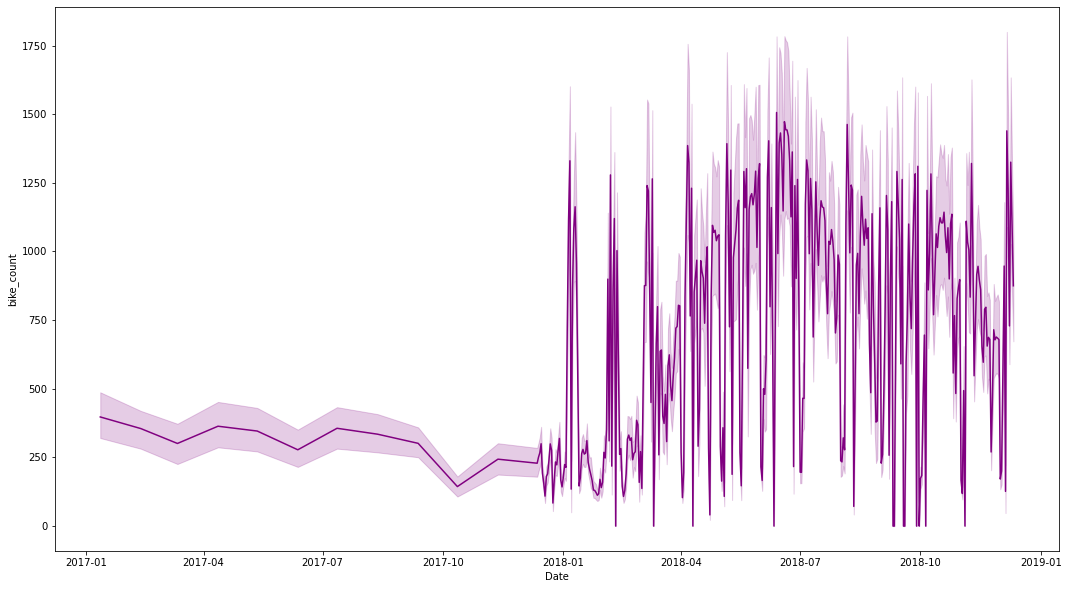

In [25]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='Date',y='bike_count',color='purple')
plt.show()

##### 1. Why did you pick the specific chart?

## For knowing the Demand of the bikes year-wise, we used the  line chart because it will easily display the time analysis.

## 3. Will the gained insights help creating a positive business impact? 
##Are there any insights that lead to negative growth? Justify with specific reason.

## Clearly, we can see that most demand of rented bikes started to peak in the Year 2018. People initally has'nt used that much bikes maybe it was a new thing maybe that is why it's not in that demand. But after that it increases in 2018.We can initially purchase less vehicle for the first year and start to purchase more by looking at the demand.

# **Season vs Bike Count**

---





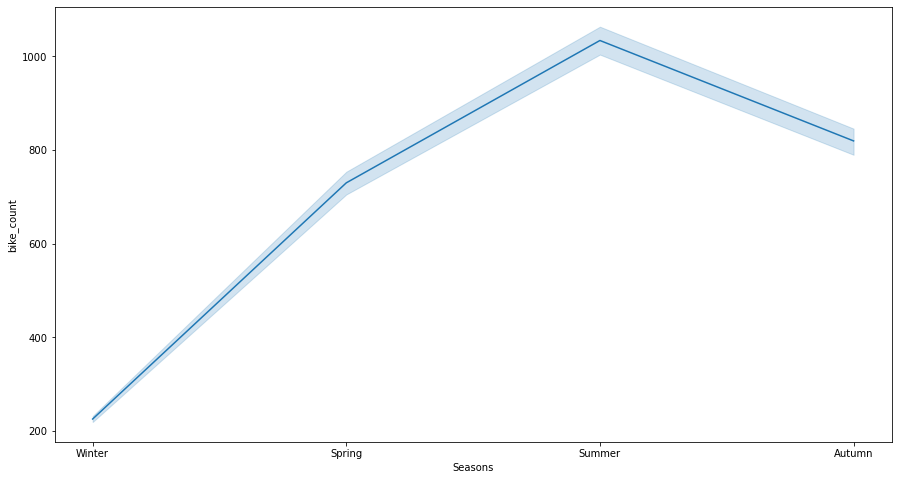

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, y="bike_count",x='Seasons' )
plt.show()

##### 1. Why did you pick the specific chart?

## I have chosen line chart so as it will clearly show a high and low end fluctuation clearly.

##### 2. What is/are the insight(s) found from the chart?

## We can see that the demand increases from winter to summer via spring , nd then it decreases in autumn.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Most busy season is the summer season and least busy is winter season. The maximum temperature in Korea can rose to 32 degree celsius which is a pleasant temperature for using the rental bikes .In winters, the demand decreases due to snow on the road.People still uses the rented bikes in rainfall but they totally avoid in winters.

# **Barplot to look at the hourly distribution**

---



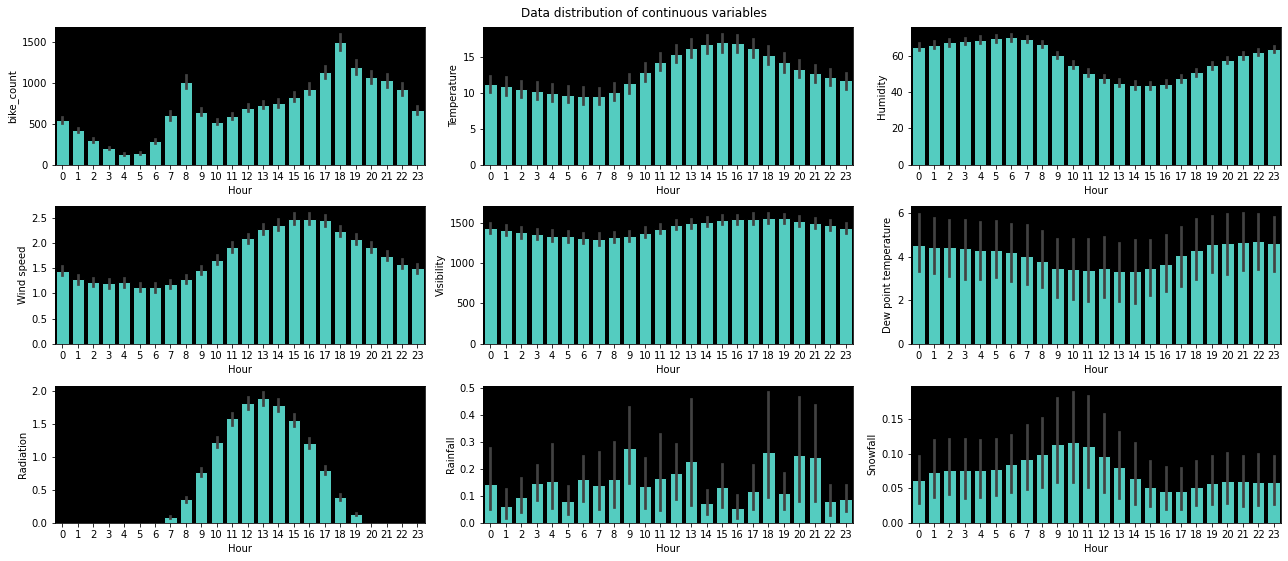

In [27]:
plt.figure(figsize=(18,10))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="black",color='turquoise')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

# We will see how the  continous variables are affected by time. What are there pattern ,at what time they are at its peak, how are they fluctuating with due course of time.
## 1) Bike demand has been high in 9 AM and 6 PM. This is mostly due to the people who are going to office and colleges.
## 2)Radiation is at its peak in 12 to 1 PM and being 0 at night.
## 3) Rainfall is quite unpredictable thorughout the year. Rain can occur anytime.

##4 )Temperature and humidity are inversely proportioned , surprisingly, the time when humidity is low, temperature is usually high and at its peak. Same goes for temperature too.

## **Month vs Bike Count**


---





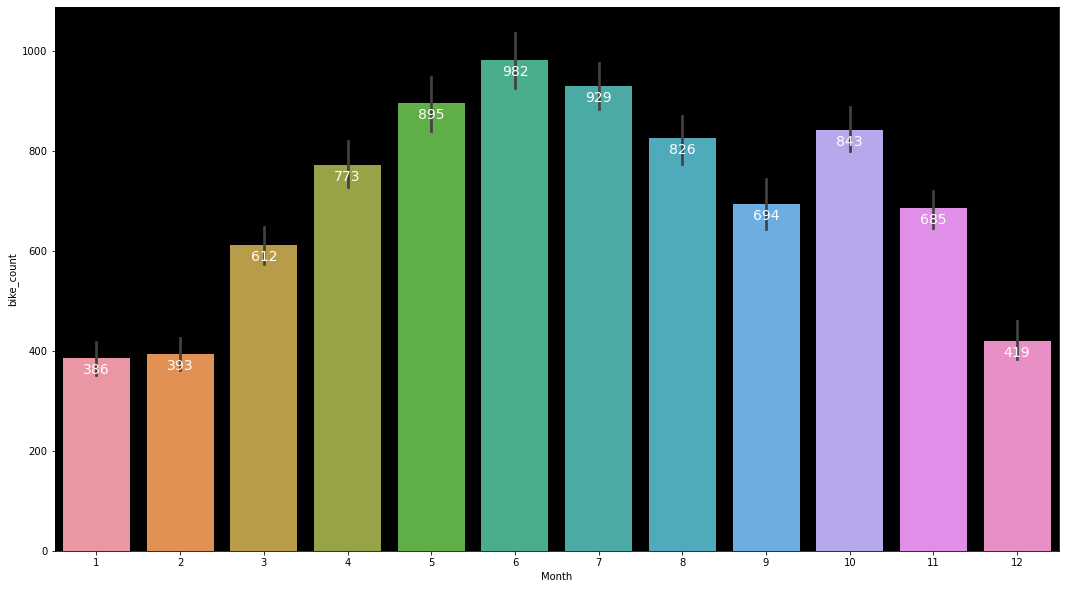

In [28]:
plt.figure(figsize=(18,10))
ax=sns.barplot(data=df,x='Month',y='bike_count')
for i in ax.patches:
  ax.annotate(format(round(i.get_height()), '.0f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha='center', va='center',color='White',
                   size=14,
                   xytext=(0, -12),
                   textcoords='offset points')
plt.show()

## From the above plot , we can see that the demand of the bikes has been increased from 4th month to the 10th month.
##Main reasons for this is because it comes under the summer season.

## **Total Bike rented on Holiday vs Non-Holiday**

---



In [29]:
ax=(df.groupby('Holiday').sum()).reset_index('Holiday')
ax

Holiday  bike_count  Temperature  Humidity  Wind speed  Visibility  \
0     Holiday      215895       4298.3     23212       790.4      657366   
1  No Holiday     5956419     108556.1    486850     14319.8    11929228   

   Dew point temperature  Radiation  Rainfall  Snowfall  
0                  106.2     237.49      33.7      22.0  
1                35580.4    4747.92    1268.8     635.6

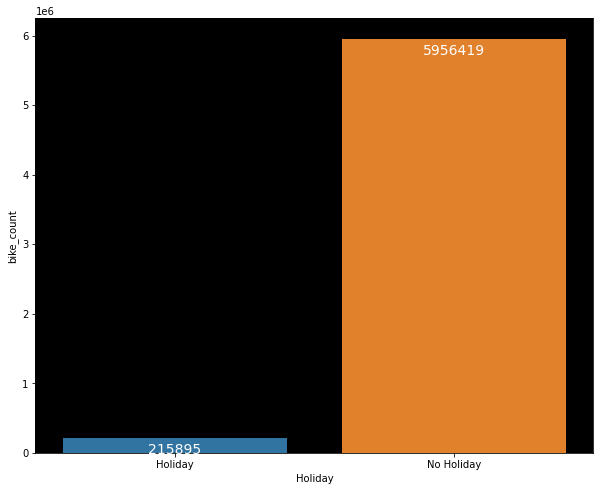

In [30]:
plt.figure(figsize=(10,8))
b=sns.barplot(data=ax,x='Holiday',y="bike_count")
for i in b.patches:
  b.annotate(format(round(i.get_height()), '.0f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha='center', va='center',color='White',
                   size=14,
                   xytext=(0, -12),
                   textcoords='offset points')



## We get to know that total bikes rented on a Holiday is 21,5985 and on a non-holiday is 5956419.

## We can provide adequate service time  to the bikes and also can utilise the data to realize that the demand have been high in a non-holiday. 

# Data wise bike distribution with respect to Continous Variables 


---





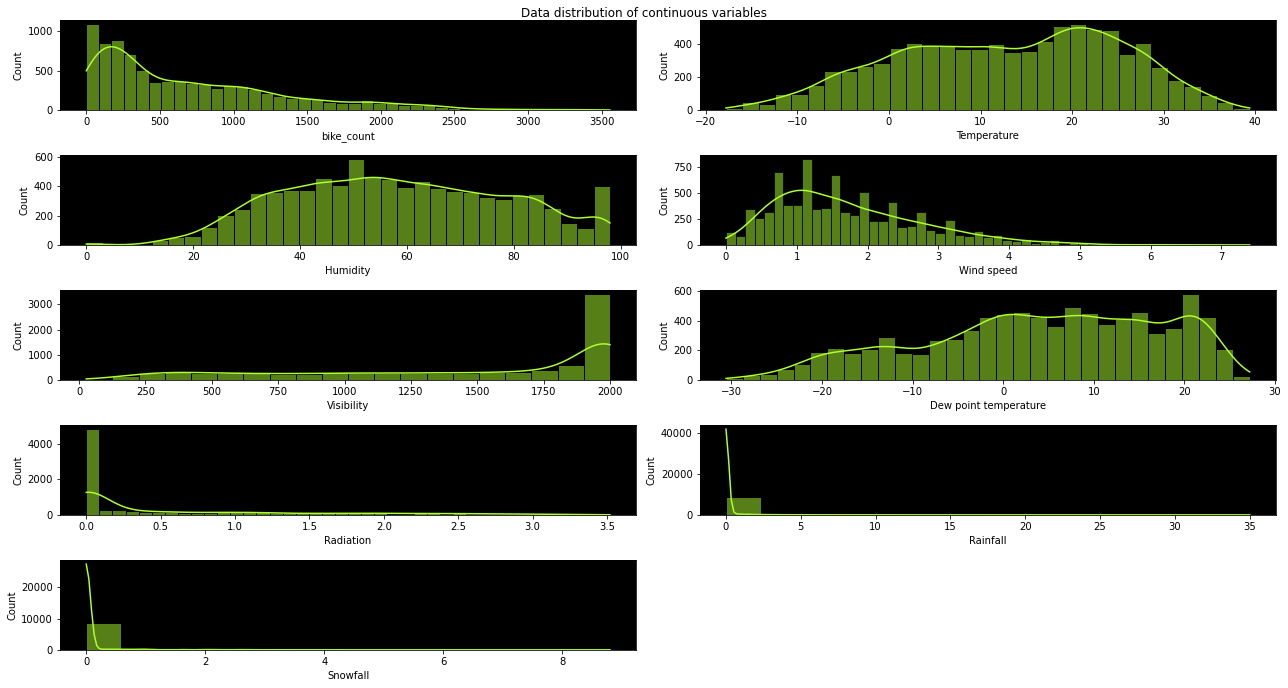

In [31]:
plt.figure(figsize=(18,15))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(8,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='greenyellow',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [33]:
df.skew()

bike_count                1.153428
Temperature              -0.198326
Humidity                  0.059579
Wind speed                0.890955
Visibility               -0.701786
Dew point temperature    -0.367298
Radiation                 1.504040
Rainfall                 14.533232
Snowfall                  8.440801
dtype: float64

In [34]:
df.kurtosis()

bike_count                 0.853387
Temperature               -0.837786
Humidity                  -0.803559
Wind speed                 0.727179
Visibility                -0.961980
Dew point temperature     -0.755430
Radiation                  1.126433
Rainfall                 284.991099
Snowfall                  93.803324
dtype: float64

#Skewness of our dependent variable is 1.15


#Skewness- Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve.

# We get to know very well about the distribution of the data, which is mostly right skewed , we will apply power transformation ahead in data transformation section  to bring changes in the data.

# **Total Rented Bikes in  the Week**

---



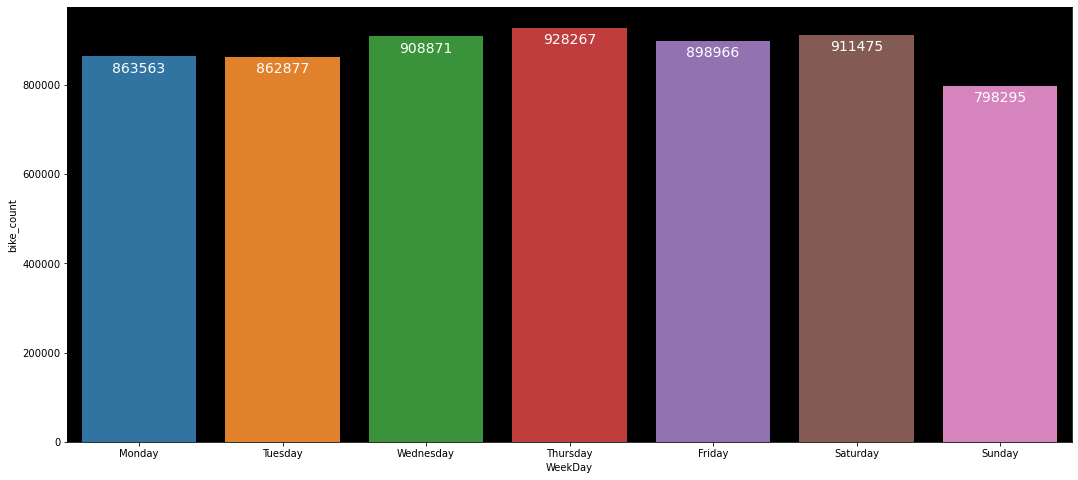

In [35]:
 plt.figure(figsize=(18,8))

ax=(df.groupby(["WeekDay"]).sum()).reset_index('WeekDay')
c=sns.barplot(data=ax,x="WeekDay",y="bike_count",order=["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
for i in c.patches:

  c.annotate(format(round(i.get_height()), '.0f'),
                   (i.get_x() + i.get_width() / 2., i.get_height()),
                   ha='center', va='center',color='White',
                   size=14,
                   xytext=(0, -12),
                   textcoords='offset points')

# Rented bike in the Day

<AxesSubplot:xlabel='Day', ylabel='bike_count'>

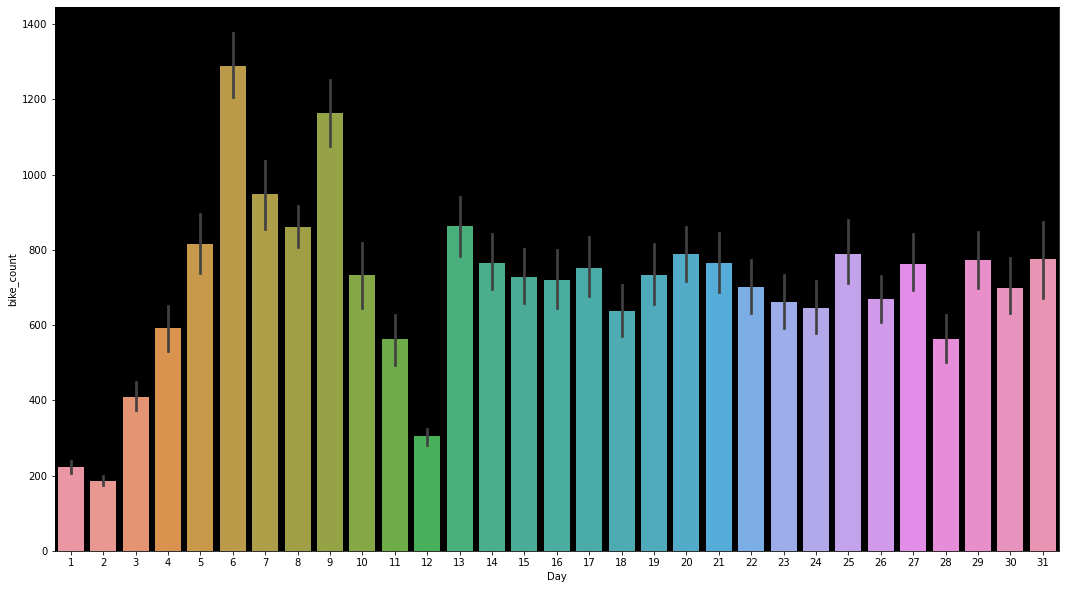

In [36]:
plt.figure(figsize=(18,10))
sns.barplot(data=df,x='Day',y="bike_count")






#**Functioning Day**


---



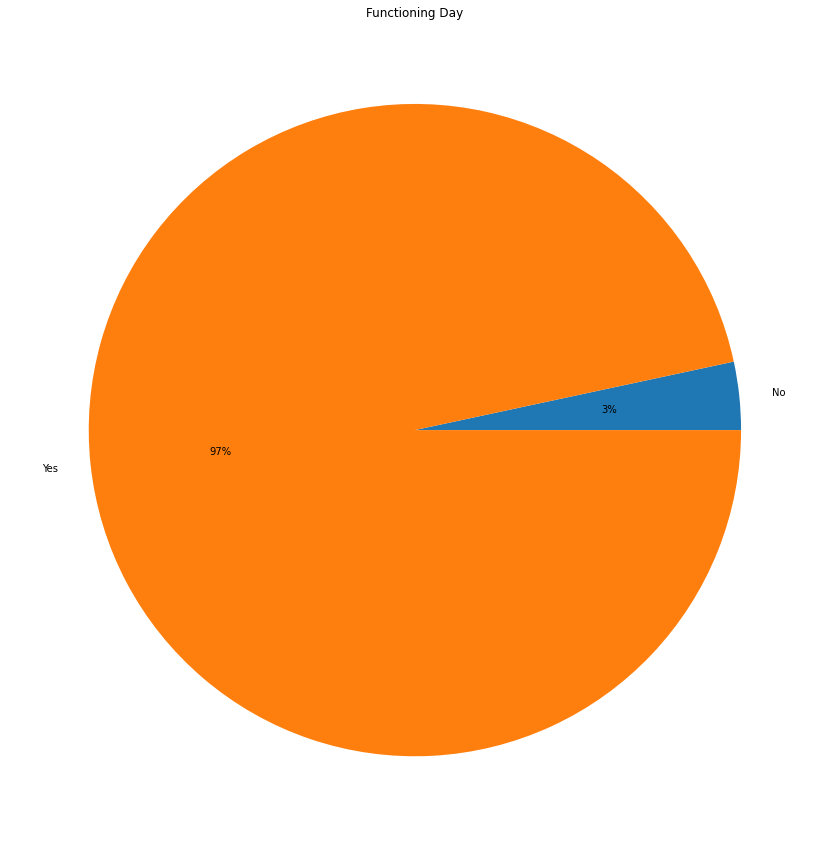

In [37]:
plt.figure(figsize=(18,15))
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

We can see approx 97% of the people have rented the bike on the functioning day

# **Lets try to find how is the relation of numerical features with our dependent variable**

---



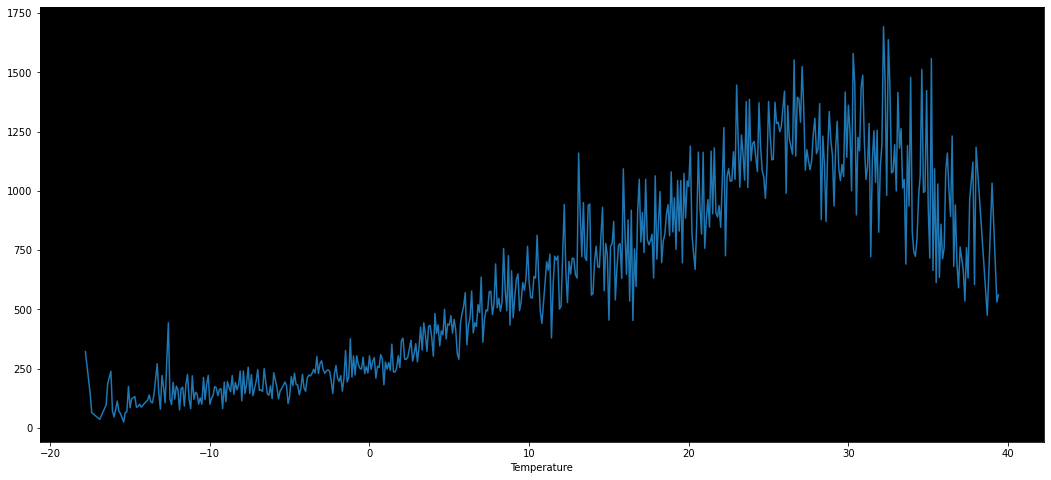

In [38]:
plt.figure(figsize=(18,8))
df.groupby('Temperature').mean()['bike_count'].plot()
plt.show()

*From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C in average*

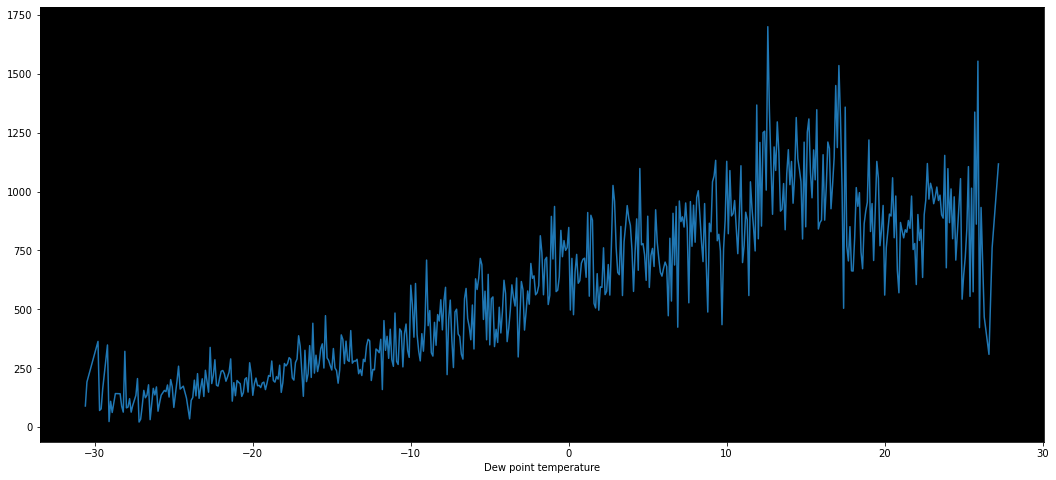

In [39]:

#print the plot to analyze the relationship between "bike_count" and "Dew_point_temperature" 
plt.figure(figsize=(18,8))
df.groupby('Dew point temperature').mean()['bike_count'].plot()
plt.show()

*From the above plot of "Dew_point_temperature', is almost same as the 'temperature' there is some similarity present we can check it in our next step.*

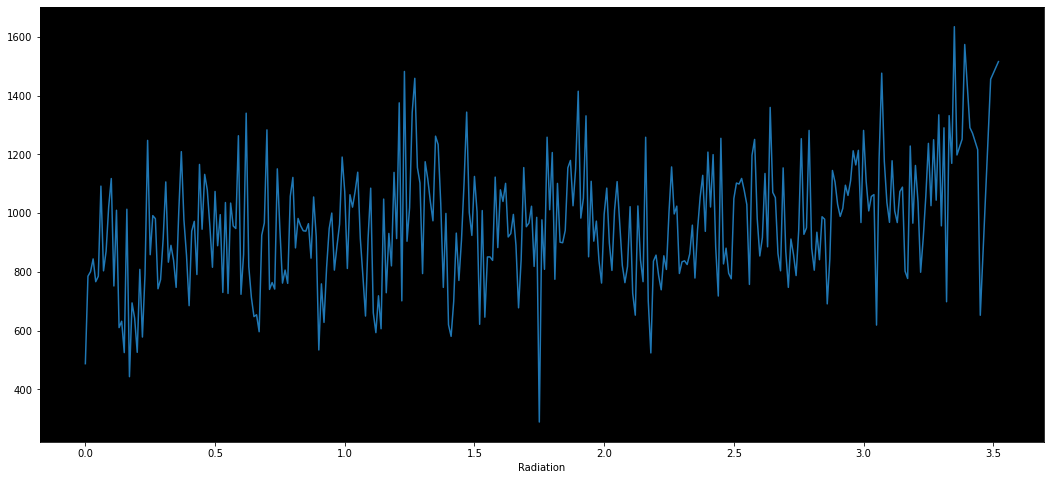

In [40]:
plt.figure(figsize=(18,8))
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Radiation').mean()['bike_count'].plot()
plt.show()

*from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000*

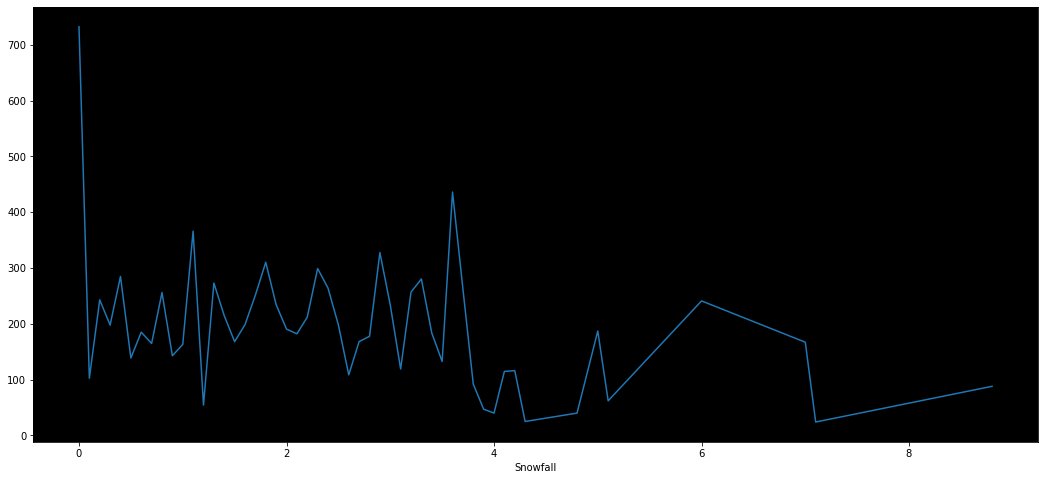

In [41]:
plt.figure(figsize=(18,8))
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['bike_count'].plot()
plt.show()

*We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower*

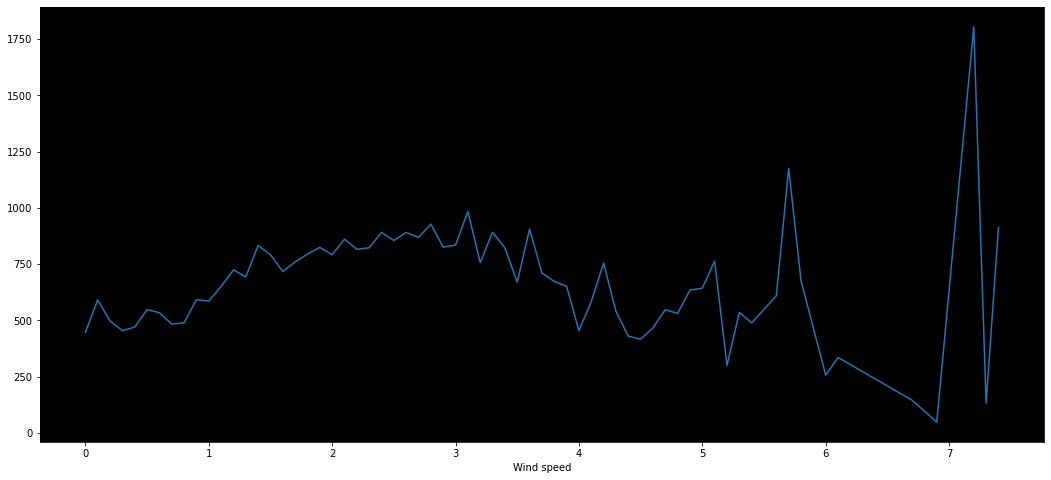

In [42]:
#let 's now plot between wind speed and bike count
plt.figure(figsize=(18,8))
df.groupby('Wind speed').mean()['bike_count'].plot()
plt.show()

We can see from the above plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy.

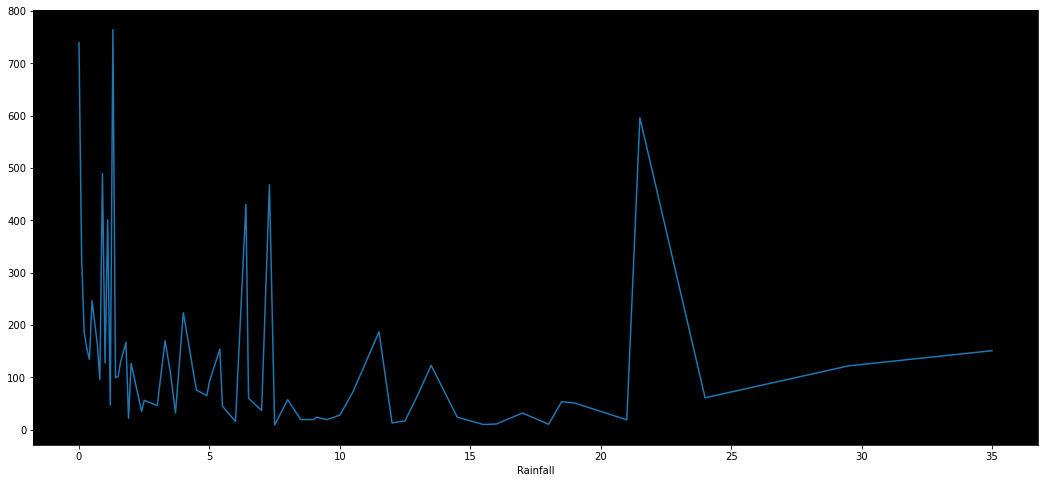

In [43]:
#let 's now plot between rainfall and bike count
plt.figure(figsize=(18,8))
df.groupby('Rainfall').mean()['bike_count'].plot()
plt.show()

We can see from the above plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes.


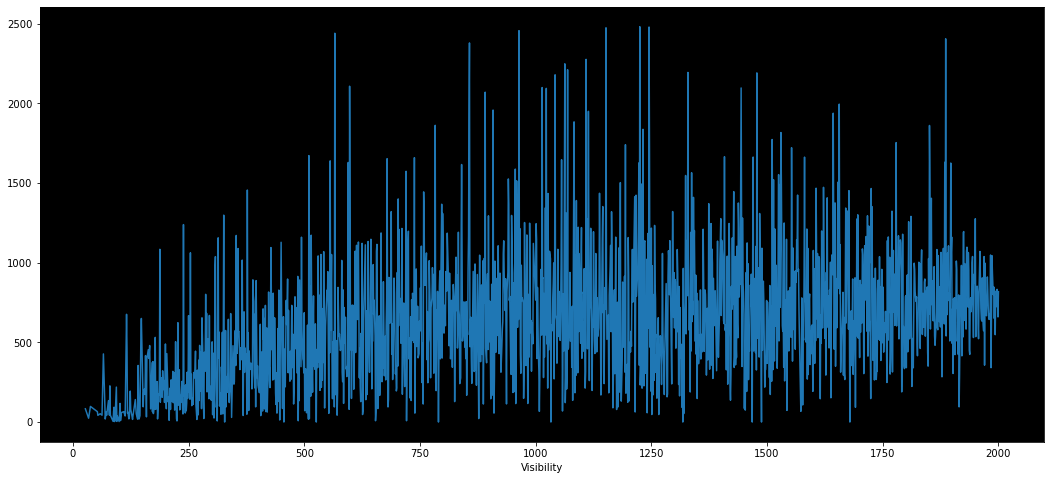

In [44]:
plt.figure(figsize=(18,8))
plt.rcParams['axes.facecolor'] = 'black'
df.groupby('Visibility').mean()['bike_count'].plot()
plt.show()

Less visibility will not be suitable for driving the bike ,so it tends to have a direct relation with the bike demands.

# **Box plot of every Numerical Variable**

---



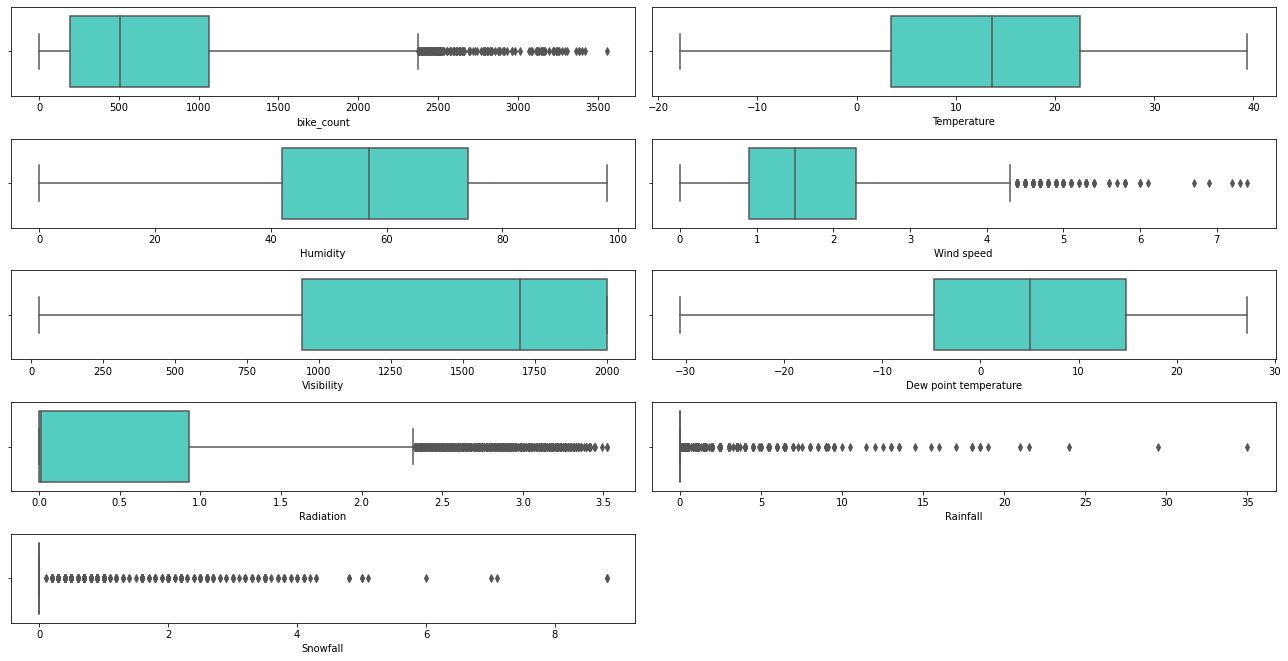

In [45]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(10,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='turquoise')

plt.tight_layout()

## 1. Why did you pick the specific chart?

#Box Plot is one of the most desirable charts for finding outliers. We have been focused on finding minimum , quantile , mean, pentile and maximum value.
#After plotting the box plot we see that there are many outliers present in each numerical variable. We will apply power transformation to remove the outliers.


##2. Will the gained insights help creating a positive business impact? 
##Are there any insights that lead to negative growth? Justify with specific reason.

#It will help us to know some of the values that are being different from the rest of the whole group.

# Chart - 14 - Correlation Heatmap

---







#The two main types of correlation :

#positive and negative.


#Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.


#Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.



#Correlation can be used to test hypotheses about cause and effect relationships between variables. 


#We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are:

#1)the temperature

#2)the dew point temperature

#3)the solar radiation


#From the below correlation heatmap, We see that there is a positive
#correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.

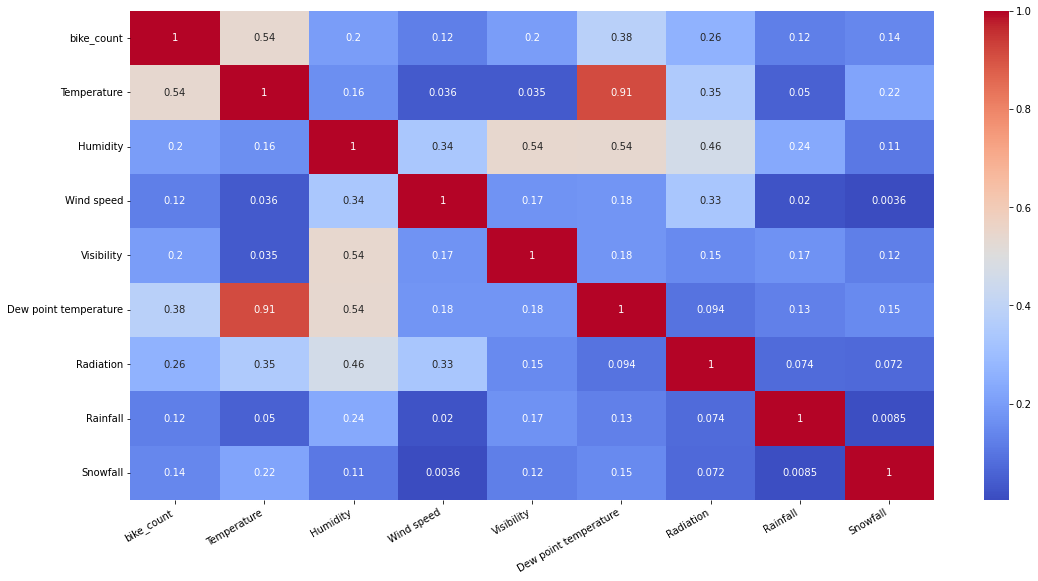

In [46]:
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# checking the muitcollinearity by VIF

---



In [47]:
# Defining a function to calculate Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

## VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.




##Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; i
##A rule of thumb for interpreting the variance inflation factor:
##👉 1 = not correlated.
##👉 Between 1 and 5 = moderately correlated.
##👉 Greater than 5 = highly correlated.

In [48]:
#checking the  VIF of only depenedent variables
x=df.drop("bike_count",axis=1)
independent_variables = x.select_dtypes(include=['float','int']).columns
calc_vif(df[independent_variables])

variables        VIF
0            Temperature  29.075866
1  Dew point temperature  15.201989
2             Visibility   9.051931
3               Humidity   5.069743
4             Wind speed   4.517664
5              Radiation   2.821604
6               Snowfall   1.118903
7               Rainfall   1.079919

#We get to know that Dew point temperature is highly correleated, and we don't have that much use in the correlation.We will delete this and since Summer and Winter can also be classified on the basis of temperature and we already have that feature present. Even if we drop these features the useful information will not be lost.We will drop them in the section of feature manipulating.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   bike_count             8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Radiation              8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

# We can see and correlation between each of the categories so we use that and also we can analyse some extra correlation with the features.


#VIF determines the strength of the correlation between the independent variables.

 #It is predicted by taking a variable and regressing it against every other variable.
#VIF score of an independent variable represents how well the variable is explained by other independent variables.

What insights can be obtained?


#By looking at the heatmap and the VIF table ,We know dew point temperature and the temperature has correlation nearly to 1, which intend to have positive correlation with the bike demand.

#### Chart - 15 - Pair Plot 

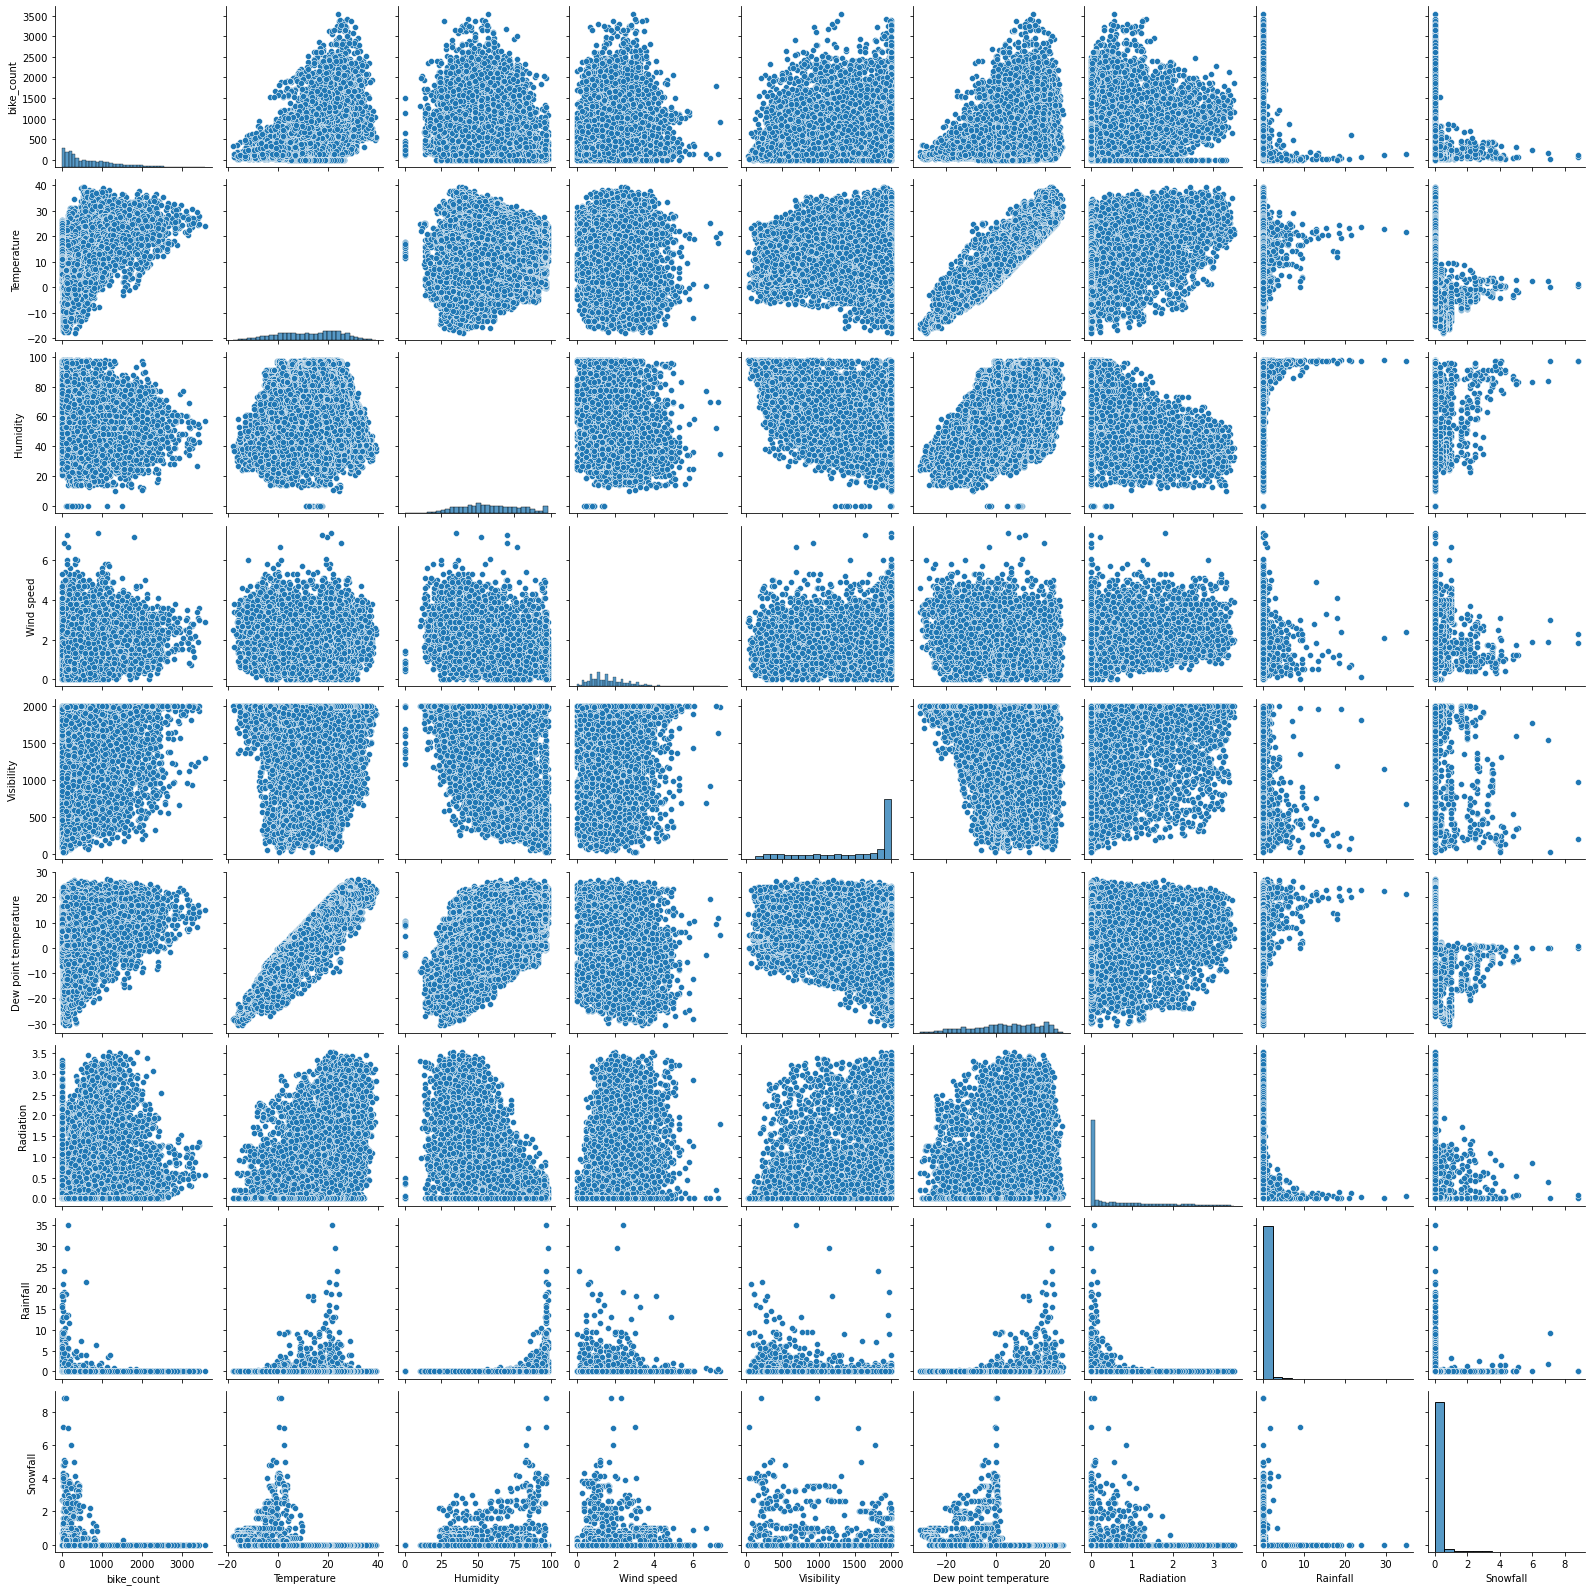

In [50]:
sns.pairplot(data=df)

As there are so many features so it will create a pir plot of around 400 charts , so we will try to plot the chart after the feature selection.

#  5. Hypothesis Testing

### Based on your chart experiments, define hypothetical statements from the dataset. In the next questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


Based on above chart experiments we have noticed that our dependent variable does not seems to normally distributed so we have made hypothetical assumption that our data is normally distributed and for that we have decided to do statistical analysis.

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null hypothesis : Data is normally distributed
    
    
Alternate hypothesis : Data is not normally distributed
    
    


In [51]:
from scipy.stats import shapiro

test_data = df['bike_count']

stats,p  = shapiro(test_data)
print('stats = %.2f, p=%.3f' % (stats,p))

if p <= 0.05:
  print("Reject null hypothesis i.e  Data is not normally distributed")
else:
  print('Accept null hypothesis i.e  Data is normally distributed')
     


stats = 0.88, p=0.000
Reject null hypothesis i.e  Data is not normally distributed


### Which statistical test have you done to obtain P-Value?

We use Shapiro-wilk statistical test to obtain the p-value and we got very less p-value which is less than 0.05.


### Why did you choose the specific statistical test?





The Shapiro-Wilk test is used to test the normality of a sample. The test checks whether the sample data fits a normal distribution, which is often assumed for statistical analysis. The test results can help determine if the data should be transformed or if non-parametric statistical methods should be used instead of traditional parametric methods.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [52]:
print( df.isna().sum())
df



Date                     0
bike_count               0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
WeekDay                  0
Day                      0
Month                    0
Year                     0
dtype: int64


Date  bike_count Hour  Temperature  Humidity  Wind speed  \
0    2017-01-12         254    0         -5.2        37         2.2   
1    2017-01-12         204    1         -5.5        38         0.8   
2    2017-01-12         173    2         -6.0        39         1.0   
3    2017-01-12         107    3         -6.2        40         0.9   
4    2017-01-12          78    4         -6.0        36         2.3   
...         ...         ...  ...          ...       ...         ...   
8755 2018-11-30        1003   19          4.2        34         2.6   
8756 2018-11-30         764   20          3.4        37         2.3   
8757 2018-11-30         694   21          2.6        39         0.3   
8758 2018-11-30         712   22          2.1        41         1.0   
8759 2018-11-30         584   23          1.9        43         1.3   

      Visibility  Dew point temperature  Radiation  Rainfall  Snowfall  \
0           2000                  -17.6        0.0       0.0       0.0   
1           2000                  -17.6        0.0       0.0       0.0   
2           2000                  -17.7        0.0       0.0       0.0   
3           2000                  -17.6        0.0       0.0       0.0   
4           2000                  -18.6        0.0       0.0       0.0   
...          ...                    ...        ...       ...       ...   
8755        1894                  -10.3        0.0       0.0       0.0   
8756        2000                   -9.9        0.0       0.0       0.0   
8757        1968                   -9.9        0.0       0.0       0.0   
8758        1859                   -9.8        0.0       0.0       0.0   
8759        1909                   -9.3        0.0       0.0       0.0   

     Seasons     Holiday Functioning Day   WeekDay Day Month  Year  
0     Winter  No Holiday             Yes  Thursday  12     1  2017  
1     Winter  No Holiday             Yes  Thursday  12     1  2017  
2     Winter  No Holiday             Yes  Thursday  12     1  2017  
3     Winter  No Holiday             Yes  Thursday  12     1  2017  
4     Winter  No Holiday             Yes  Thursday  12     1  2017  
...      ...         ...             ...       ...  ..   ...   ...  
8755  Autumn  No Holiday             Yes    Friday  30    11  2018  
8756  Autumn  No Holiday             Yes    Friday  30    11  2018  
8757  Autumn  No Holiday             Yes    Friday  30    11  2018  
8758  Autumn  No Holiday             Yes    Friday  30    11  2018  
8759  Autumn  No Holiday             Yes    Friday  30    11  2018  

[8760 rows x 18 columns]

#### What all missing value imputation techniques have you used and why did you use those techniques?

## The Dataset has no values, so no imputation technique is required.

### 2. Handling Outliers

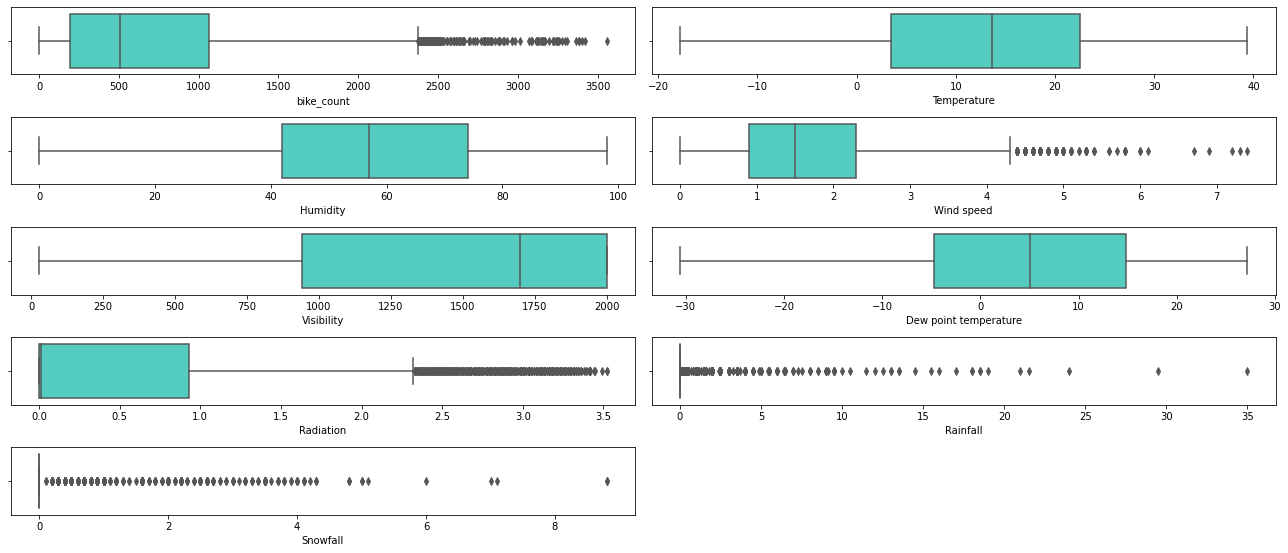

In [53]:
#Looking at the outliers with the help of Box plot.

plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(10,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='turquoise')

plt.tight_layout()

*Median: In the box plot, the median is displayed rather than the mean.
* Q1: The first quartile (25%) position.
* Q3: The third quartile (75%) position.
* Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.
* Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

In [54]:
#selecting variables that have data types float and int.
var=list(df.select_dtypes(include=['float64','int64']).columns)
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

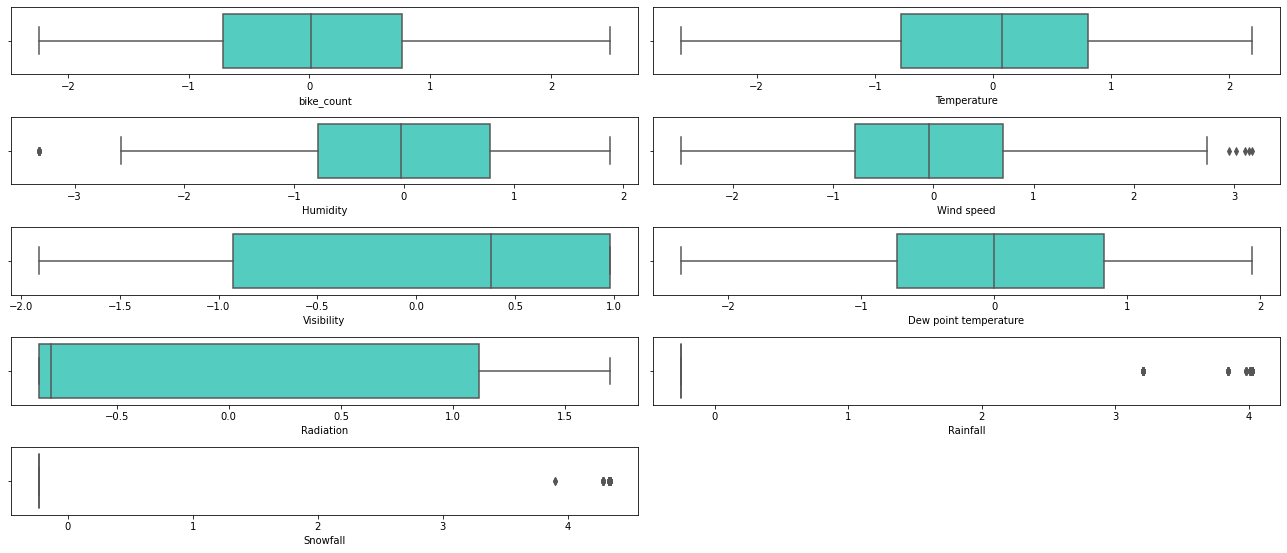

In [55]:
#looking at the box plot now
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(10,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='turquoise')

plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

 # PowerTransformer is used to make the data distribution more-Gaussian and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.


#here are two popular approaches for such automatic power transforms; they are:

#1)Box-Cox Transform

#2)Yeo-Johnson Transform


#The transformed training dataset can then be fed to a machine learning model to learn a predictive modeling task.

#A hyperparameter, often referred to as lambda  is used to control the nature of the transform.

### 3. Categorical Encoding

In [56]:
#converting the categorical column into one hot encoding
encoder = {'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0}}
          

In [57]:
df.replace(encoder,inplace=True)

In [58]:

df = pd.get_dummies(df, columns=['Seasons','WeekDay','Hour','Month'], prefix='', prefix_sep='')

df

Date  bike_count  Temperature  Humidity  Wind speed  Visibility  \
0    2017-01-12   -0.530004    -1.524521 -1.038829    0.618103    0.978214   
1    2017-01-12   -0.676497    -1.550870 -0.986482   -0.923651    0.978214   
2    2017-01-12   -0.779424    -1.594819 -0.934363   -0.640327    0.978214   
3    2017-01-12   -1.047379    -1.612409 -0.882465   -0.778203    0.978214   
4    2017-01-12   -1.200315    -1.594819 -1.091410    0.700184    0.978214   
...         ...         ...          ...       ...         ...         ...   
8755 2018-11-30    0.695553    -0.715942 -1.197308    0.932074    0.762392   
8756 2018-11-30    0.403665    -0.783248 -1.038829    0.700184    0.978214   
8757 2018-11-30    0.307082    -0.850709 -0.934363   -1.801586    0.912535   
8758 2018-11-30    0.332501    -0.892966 -0.830782   -0.640327    0.692237   
8759 2018-11-30    0.141594    -0.909892 -0.728037   -0.265185    0.792629   

      Dew point temperature  Radiation  Rainfall  Snowfall  ...  3  4  5  6  \
0                 -1.556854  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
1                 -1.556854  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
2                 -1.563069  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
3                 -1.556854  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
4                 -1.618915  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
...                     ...        ...       ...       ...  ... .. .. .. ..   
8755              -1.096786  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
8756              -1.071138  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
8757              -1.071138  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
8758              -1.064717  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   
8759              -1.032557  -0.845761 -0.252859 -0.230785  ...  0  0  0  0   

      7  8  9  10  11  12  
0     0  0  0   0   0   0  
1     0  0  0   0   0   0  
2     0  0  0   0   0   0  
3     0  0  0   0   0   0  
4     0  0  0   0   0   0  
...  .. .. ..  ..  ..  ..  
8755  0  0  0   0   1   0  
8756  0  0  0   0   1   0  
8757  0  0  0   0   1   0  
8758  0  0  0   0   1   0  
8759  0  0  0   0   1   0  

[8760 rows x 61 columns]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   bike_count             8760 non-null   float64       
 2   Temperature            8760 non-null   float64       
 3   Humidity               8760 non-null   float64       
 4   Wind speed             8760 non-null   float64       
 5   Visibility             8760 non-null   float64       
 6   Dew point temperature  8760 non-null   float64       
 7   Radiation              8760 non-null   float64       
 8   Rainfall               8760 non-null   float64       
 9   Snowfall               8760 non-null   float64       
 10  Holiday                8760 non-null   int64         
 11  Functioning Day        8760 non-null   int64         
 12  Day                    8760 non-null   category      
 13  Yea

We have to convert functioning Day and Holiday into uint8 data type.

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used the One Hot Encoding and categorised the values.Removed all the outliers and converted all of the data into numerical format.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation and Feature Selection






In [60]:
# Manipulate Features to minimize feature correlation and create new features
# We will now drop the that important features, like Dew point temperature, summer and winter which can be count as extra features.

x=df.drop('bike_count',axis=1)
independent_variables = x.select_dtypes(include=['float64','int64']).columns
calc_vif(df[independent_variables])

variables        VIF
0  Dew point temperature  60.291119
1            Temperature  45.796902
2               Humidity  12.012676
3              Radiation   1.858476
4             Visibility   1.560431
5             Wind speed   1.232679
6               Rainfall   1.195283
7               Snowfall   1.166798
8                Holiday   1.053368
9        Functioning Day   1.048196

In [61]:
# Updating the dataset
df.drop(['Dew point temperature',"Date","Year","Day"],axis=1,inplace=True)


In [62]:
x=df.drop("bike_count",axis=1)
independent_variables = x.select_dtypes(include=['float64','int64']).columns
calc_vif(df[independent_variables])

variables       VIF
0         Humidity  2.439876
1        Radiation  1.827529
2      Temperature  1.563883
3       Visibility  1.496669
4       Wind speed  1.232555
5         Rainfall  1.194952
6         Snowfall  1.162399
7          Holiday  1.053293
8  Functioning Day  1.047928

summer and winter must also be dropped due to high correlation values

In [63]:
df.drop(["Summer","Winter"],axis=1,inplace=True)

#On the basis of removal of all extra features, we have done all the necessary things and now we can make a model.

### 5. Data Transformation

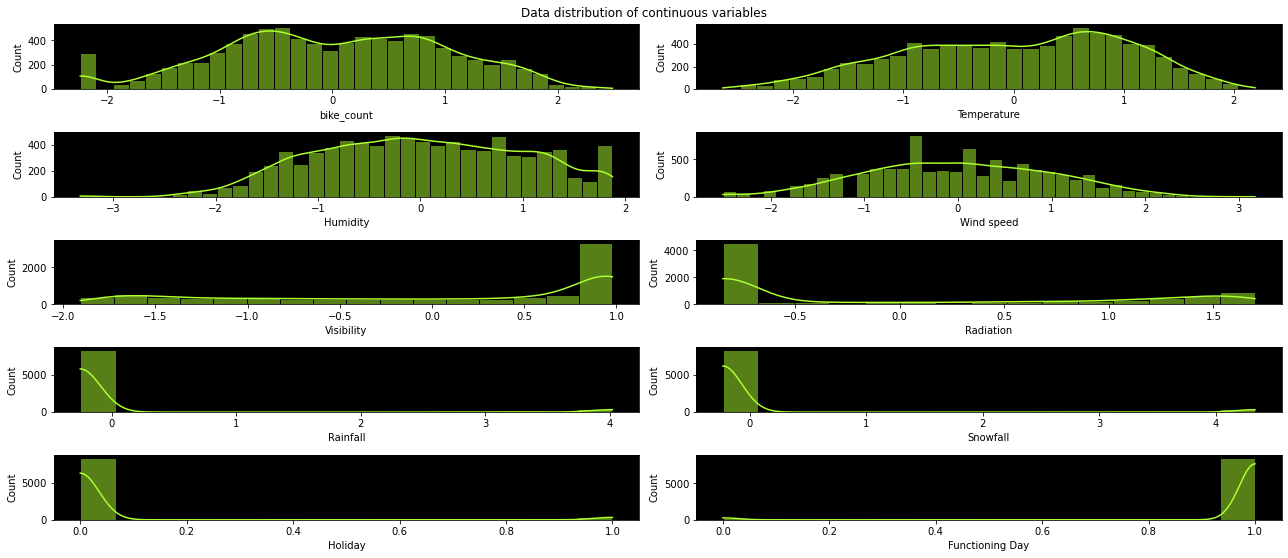

In [64]:
#Looking at the clean data distribution now
plt.figure(figsize=(18,12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(8,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='greenyellow',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

#I have done Power Transformation,which help us to make data more Gaussian Like.Have performed feature selection to make the data more easy and  can make it easier for the model to learn.

### 6. Data Scaling

In [65]:
# Scaling your data
features=[i for i in df.columns if i  not in ['bike_count']]
scaler=StandardScaler()
scaler.fit_transform(df[features])

array([[-1.52452141, -1.0388285 ,  0.61810307, ..., -0.2992528 ,
        -0.20851441, -0.30465451],
       [-1.55087024, -0.98648176, -0.92365142, ..., -0.2992528 ,
        -0.20851441, -0.30465451],
       [-1.59481869, -0.9343628 , -0.64032653, ..., -0.2992528 ,
        -0.20851441, -0.30465451],
       ...,
       [-0.85070935, -0.9343628 , -1.80158616, ...,  3.34165628,
        -0.20851441, -0.30465451],
       [-0.89296632, -0.83078201, -0.64032653, ...,  3.34165628,
        -0.20851441, -0.30465451],
       [-0.90989244, -0.72803697, -0.26518524, ...,  3.34165628,
        -0.20851441, -0.30465451]])

In [66]:
df.describe().T

count          mean       std       min       25%       50%  \
bike_count       8760.0 -1.953812e-15  1.000057 -2.237130 -0.718335  0.008902   
Temperature      8760.0  3.093162e-15  1.000057 -2.640013 -0.774827  0.076415   
Humidity         8760.0  1.656425e-15  1.000057 -3.323576 -0.779308 -0.028964   
Wind speed       8760.0  6.125744e-16  1.000057 -2.512538 -0.778203 -0.041752   
Visibility       8760.0 -2.143630e-15  1.000057 -1.906656 -0.926681  0.376822   
Radiation        8760.0 -9.245268e-16  1.000057 -0.845761 -0.845761 -0.792741   
Rainfall         8760.0 -1.422910e-15  1.000057 -0.252859 -0.252859 -0.252859   
Snowfall         8760.0  1.538711e-14  1.000057 -0.230785 -0.230785 -0.230785   
Holiday          8760.0  4.931507e-02  0.216537  0.000000  0.000000  0.000000   
Functioning Day  8760.0  9.663242e-01  0.180404  0.000000  1.000000  1.000000   
Autumn           8760.0  2.493151e-01  0.432641  0.000000  0.000000  0.000000   
Spring           8760.0  2.520548e-01  0.434217  0.000000  0.000000  0.000000   
Friday           8760.0  1.397260e-01  0.346722  0.000000  0.000000  0.000000   
Monday           8760.0  1.369863e-01  0.343853  0.000000  0.000000  0.000000   
Saturday         8760.0  1.424658e-01  0.349547  0.000000  0.000000  0.000000   
Sunday           8760.0  1.479452e-01  0.355066  0.000000  0.000000  0.000000   
Thursday         8760.0  1.424658e-01  0.349547  0.000000  0.000000  0.000000   
Tuesday          8760.0  1.452055e-01  0.352328  0.000000  0.000000  0.000000   
Wednesday        8760.0  1.452055e-01  0.352328  0.000000  0.000000  0.000000   
0                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
1                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
2                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
3                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
4                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
5                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
6                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
7                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
8                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
9                8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
10               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
11               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
12               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
13               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
14               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
15               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
16               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
17               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
18               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
19               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
20               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
21               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
22               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
23               8760.0  4.166667e-02  0.199838  0.000000  0.000000  0.000000   
1                8760.0  8.493151e-02  0.278796  0.000000  0.000000  0.000000   
2                8760.0  7.671233e-02  0.266150  0.000000  0.000000  0.000000   
3                8760.0  8.493151e-02  0.278796  0.000000  0.000000  0.000000   
4                8760.0  8.219178e-02  0.274672  0.000000  0.000000  0.000000   
5                8760.0  8.493151e-02  0.278796  0.000000  0.000000  0.000000   
6                8760.0  8.219178e-02  0.274672  

Data has already been scaled under normalisation and standardisation.

##### Which method have you used to scale you data and why?

### 8. Data Splitting

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [67]:
df1=df.copy()
X=df1.drop(columns=['bike_count'],axis=1)
y=df["bike_count"]

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 54)
(2190, 54)


##### What data splitting ratio have you used and why? 

0.25 is the sutiable ratio considering the shape as it will give equal information to both training and the test dataset.

# Metrics

The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.


It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.



MSE formula = (1/n) * Σ(actual – forecast)2

Where:


n = number of items,


Σ = summation notation,


Actual = original or observed y-value,



Forecast = y-value from regression.



Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).



Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.



R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

Formula for R-Squared

 
 
​
R2 =1− Total Variation Unexplained Variation​


Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​



# Model-1 Linear Regression

In [69]:
reg=LinearRegression()
reg.fit(X_train, y_train)   
reg.score(X_train, y_train)

0.8137352446919863

In [70]:
reg.coef_

array([ 4.81163827e-01, -1.04074211e-01, -1.99659523e-02,  3.46143926e-02,
        2.18905155e-01, -2.62264486e-01, -1.97121503e-03, -2.38787730e-01,
        2.62714633e+00,  3.60658887e-01,  1.81194273e-01,  4.35552995e+10,
        4.35552995e+10,  4.35552995e+10,  4.35552995e+10,  4.35552995e+10,
        4.35552995e+10,  4.35552995e+10, -1.91613058e+10, -1.91613058e+10,
       -1.91613058e+10, -1.91613058e+10, -1.91613058e+10, -1.91613058e+10,
       -1.91613058e+10, -1.91613058e+10, -1.91613058e+10, -1.91613058e+10,
       -1.91613058e+10, -1.91613058e+10, -1.91613058e+10, -1.91613058e+10,
       -1.91613058e+10, -1.91613058e+10, -1.91613058e+10, -1.91613058e+10,
       -1.91613058e+10, -1.91613058e+10, -1.91613058e+10, -1.91613058e+10,
       -1.91613058e+10, -1.91613058e+10, -2.60443597e+11, -2.60443597e+11,
       -2.60443597e+11, -2.60443597e+11, -2.60443597e+11, -2.60443597e+11,
       -2.60443597e+11, -2.60443597e+11, -2.60443597e+11, -2.60443597e+11,
       -2.60443597e+11, -

In [71]:

#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [72]:
#checking the metrics on our train dataset

#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 0.18436201788010914
RMSE : 0.4293739837019811
MAE : 0.3247000776513465
R2 : 0.8137352446919863
Adjusted R2 : 0.8090240986560928


our model has performed good on training set, it is able to cover approc 81 % of variance.

In [73]:
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])
     

In [74]:
#checking the metrics on our test dataset

#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)



#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_test)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 0.18745880067132348
RMSE : 0.43296512639163387
MAE : 0.330230282571008
R2 : 0.8179743632821445
Adjusted R2 : 0.8133704361707795


In [75]:
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
testing_df=pd.DataFrame(dict2,index=[1])
     

The test set's r2_score is 0.81. This means our linear model is performing well on the test set as well. 

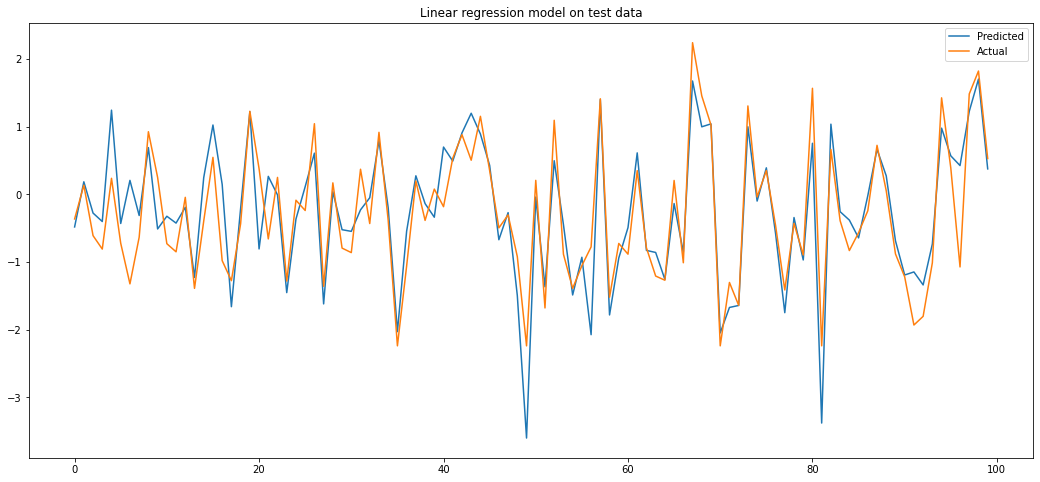

In [76]:

# Actual Price vs predicte for Linear Regression plot for 100 datasets


#Plot the figure
plt.figure(figsize=(18,8))
plt.style.context('white_background')
plt.rcParams["axes.facecolor"]="white"
plt.plot(np.array(y_pred_test[:100]))
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.title("Linear regression model on test data")
plt.show()

# Hyperparameter tuning and Cross Validation

In [79]:

# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'normalize': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)
     


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, return_train_score=True,
             scoring='r2')

In [80]:
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'normalize': False}
Best R2 score:  0.8093613847614897


In [81]:

# use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)
     

LinearRegression(normalize=False)

In [82]:
y_pred_test2=best_reg.predict(X_test)
y_pred_train2=best_reg.predict(X_train)

In [83]:

#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test2))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test2)
print("MAE :",MAE_lr)



#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_test2)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 0.18745880067132348
RMSE : 0.43296512639163387
MAE : 0.330230282571008
R2 : 0.8179743632821445
Adjusted R2 : 0.8133704361707795


In [84]:
#Let's save this for futher future comparison
dict2={'Model':'Linear regression after tuning ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
testing_df=testing_df.append(dict2,ignore_index=True)

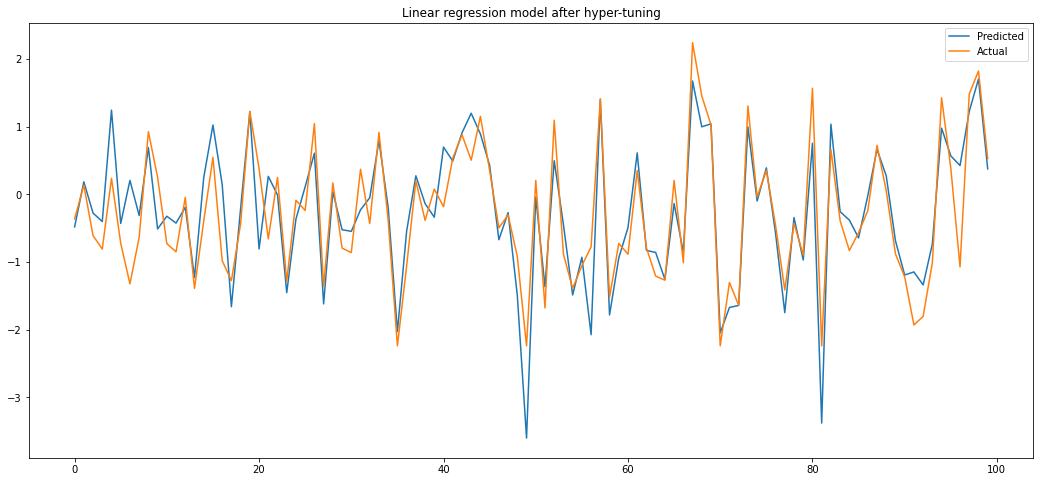

In [85]:
plt.figure(figsize=(18,8))
plt.style.context('white_background')
plt.rcParams["axes.facecolor"]="white"
plt.plot(np.array(y_pred_test2[:100]))
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Linear regression model after hyper-tuning')
plt.show()

# Which hypertuning optimization have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.




# Have you seen any improvement ?

By Looking at the dataset, we can see that after hypertuning , we get the R2 score 0.81. which is same as before hypertuning.

# Ridge and Lasso Regression


### Ridge and Lasso Regression are types of Regularization techniques
###  Regularization techniques are used to deal with overfitting and when the dataset is large
### Ridge and Lasso Regression involve adding penalties to the regression function

# Model-2 Lasso Regression

## Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. 

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [87]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter=5000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3678122091692837 0.3956714093089475


In [88]:

#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [89]:
# for training dataset
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 0.5981552347796825
RMSE : 0.7734049616983864
MAE : 0.5872149906644075
R2 : 0.3956714093089475
Adjusted R2 : 0.38038628336172653


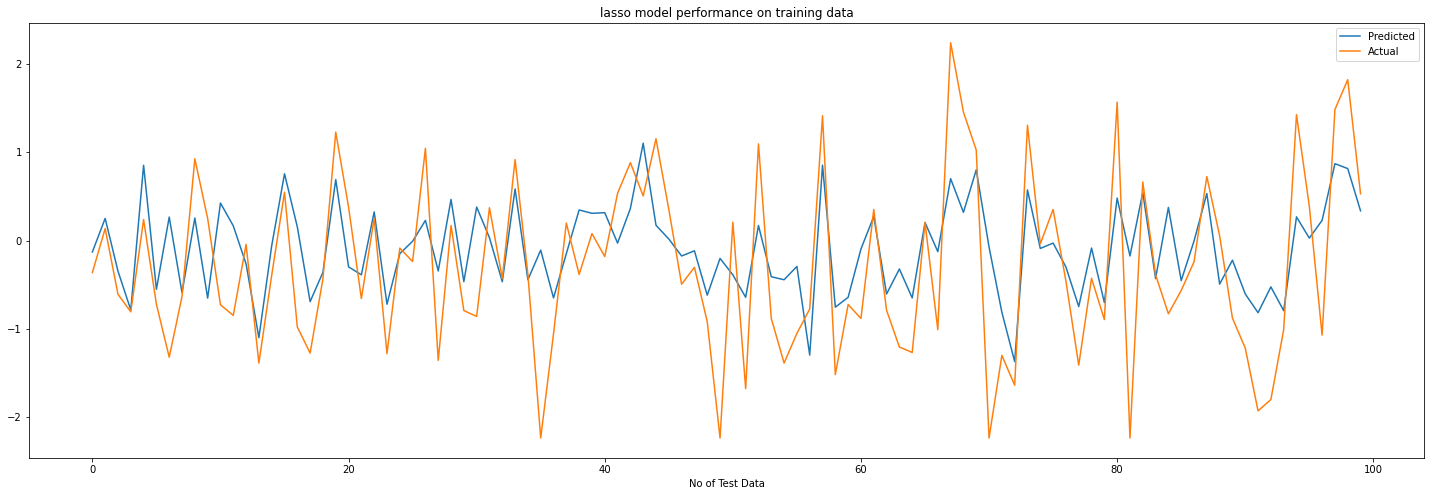

In [90]:
# Actual Price vs predicte for Lasso Regression plot for 100 datasets
plt.figure(figsize=(25,8))
plt.plot(y_pred_test_lasso[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.title("lasso model performance on training data")
plt.show()

Looks like train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance.Is is performing poorly,let's check for test set too.


Lets save it in a dataframe for later comparisons.

In [91]:

# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [92]:
# for test dataset
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_l)

MSE : 0.6510575499421097
RMSE : 0.806881372905652
MAE : 0.6082429859639547
R2 : 0.3678122091692837
Adjusted R2 : 0.35182244771501736


In [93]:

dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),2),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
testing_df=testing_df.append(dict2,ignore_index=True)

r2 is 0.36, this means our model is not performing well on test data.

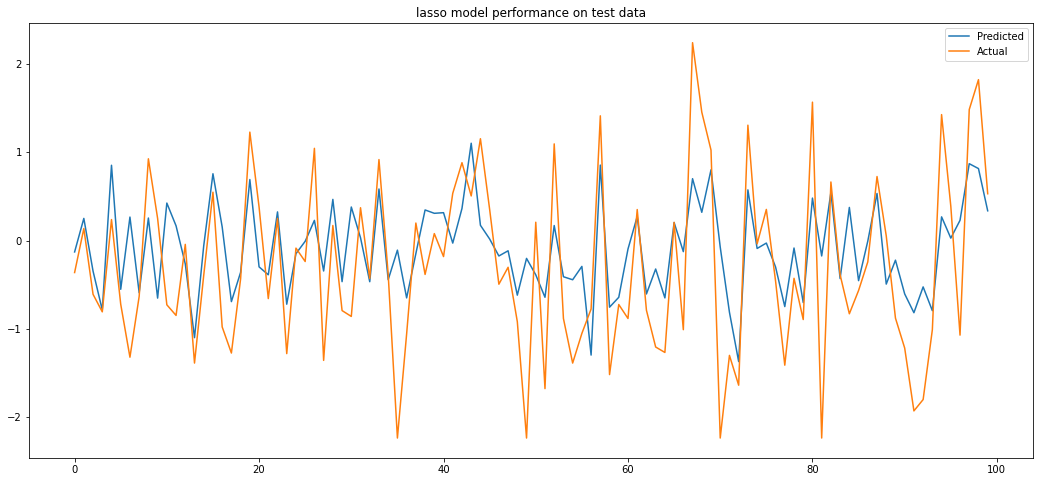

In [94]:
#Plot the figure
plt.figure(figsize=(18,8))
plt.plot(np.array(y_pred_test_lasso[:100]))
plt.plot(np.array((y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("lasso model performance on test data")
plt.show()

# Hyperparameter tuning

In [95]:
#import Lasso regressor and grid search cv
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [96]:

#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
     

The optimum alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.18856028815169296


In [97]:
lasso = Lasso(alpha=1e-05, max_iter=5000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.8179740693272546 0.8137350414367187


In [98]:

#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [99]:
# for training dataset
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 0.18436221905907743
RMSE : 0.42937421797201264
MAE : 0.32469204537800256
R2 : 0.8137350414367187
Adjusted R2 : 0.8090238902599425


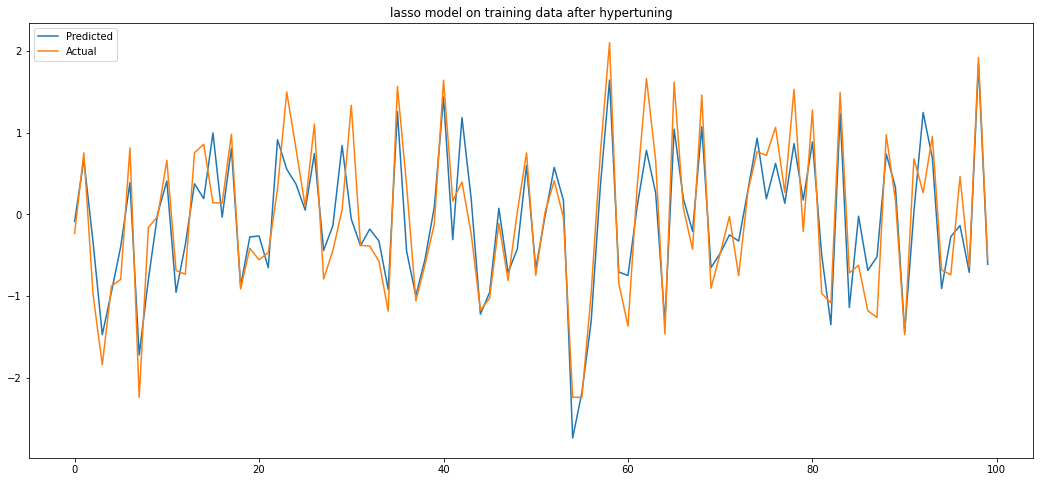

In [100]:
#Plot the figure
plt.figure(figsize=(18,8))
plt.plot(np.array(y_pred_train_lasso[:100]))
plt.plot(np.array((y_train[:100])))
plt.legend(["Predicted","Actual"])
plt.title("lasso model on training data after hypertuning")
plt.show()

Having the r score of 0.81, Our model seems to capture a large variety of data.

In [101]:
#calculating on the test dataset
#calculate MSE
MSE_l= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_l )


MSE : 0.1874591034002802
RMSE : 0.4329654759911929
MAE : 0.3302362315964813
R2 : 0.8179740693272546
Adjusted R2 : 0.813370134780965


We get r2 score as 0.81, and model is performing well on training set as well as test set.

In [102]:
# storing the training set and testing set combining details of lasso after cross validation  value in a dataframe for later comparison
dict1={'Model':'Lasso regression after tuning ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [103]:
dict2={'Model':'Lasso regression after tuning ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
testing_df=testing_df.append(dict2,ignore_index=True)

## What are the methods you have performed ?

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is a measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

# Model -3 Ridge Regression

### Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.



In [104]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [105]:
ridge.score(X_train,y_train)

0.8137350843069302

In [106]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)
     

In [107]:
#calculating from training dataset
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 0.18436217662679494
RMSE : 0.42937416856023713
MAE : 0.3247030554934779
R2 : 0.8137350843069302
Adjusted R2 : 0.8090239342144592


In [108]:
# storing the train  set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)
     

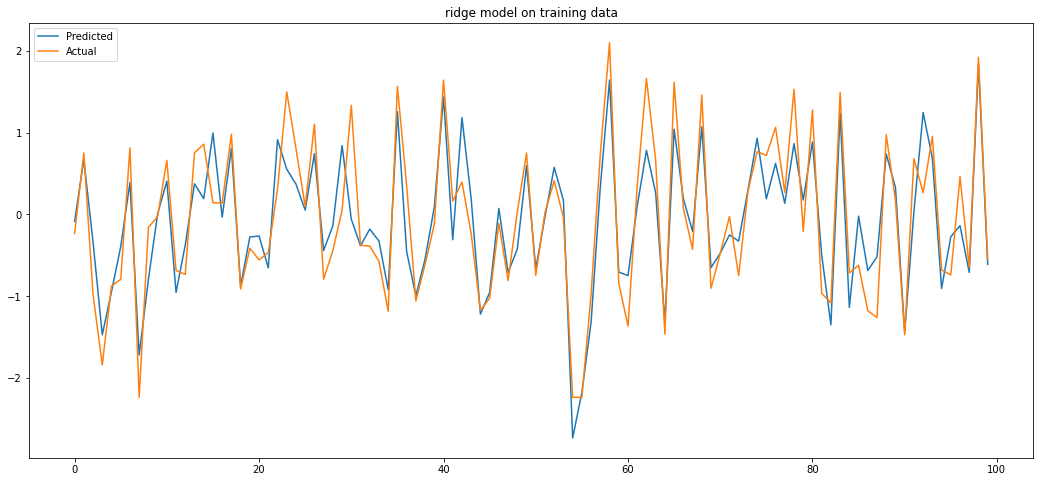

In [109]:

#Plot the figure
plt.figure(figsize=(18,8))
plt.plot((y_pred_train_ridge[:100]))
plt.plot((np.array(y_train[:100])))
plt.legend(["Predicted","Actual"])
plt.title("ridge model on training data")
plt.show()
     

In [110]:
#calculating from testing dataset
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test,y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 0.18746634433531567
RMSE : 0.4329738379340208
MAE : 0.33025141990172097
R2 : 0.8179670382579981
Adjusted R2 : 0.8133629258767016


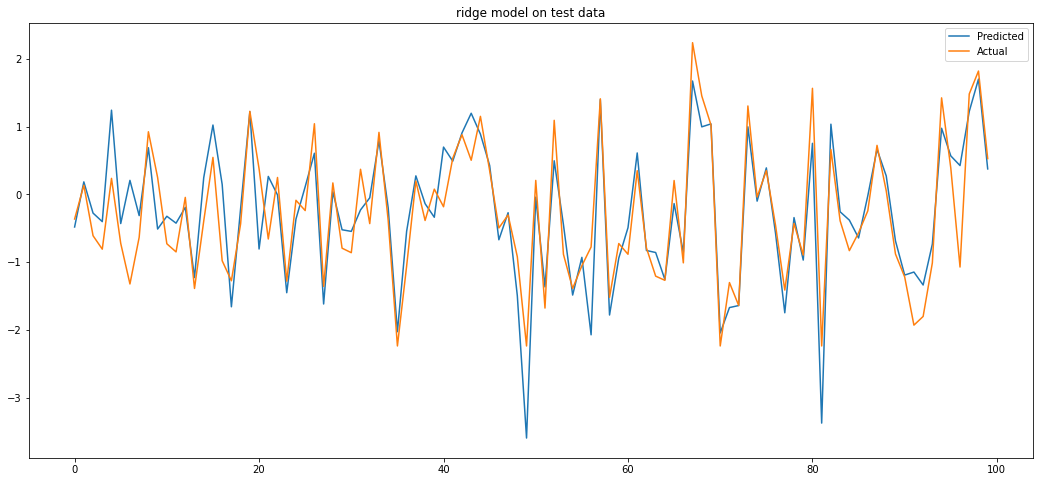

In [111]:

#Plot the figure
plt.figure(figsize=(18,8))
plt.plot((y_pred_test_ridge[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("ridge model on test data")
plt.show()

In [112]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
testing_df=testing_df.append(dict2,ignore_index=True)
     

# Hyperparameter tuning and Cross-Validation

We need to obtain best value of the hyperparameter 'alpha' so as to make accurate predictions

In [113]:

# Import Ridge regressor Class
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)
     

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [114]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ",ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.18855892760366566


In [115]:

# Initiate ridge with best alpha  
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

In [116]:
#performing on test data only
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_test), (y_pred_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test,y_pred_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_test, y_pred_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_r)

MSE : 0.18754515019034415
RMSE : 0.4330648337031583
MAE : 0.33050827107181296
R2 : 0.8178905164522078
Adjusted R2 : 0.8132844686247696


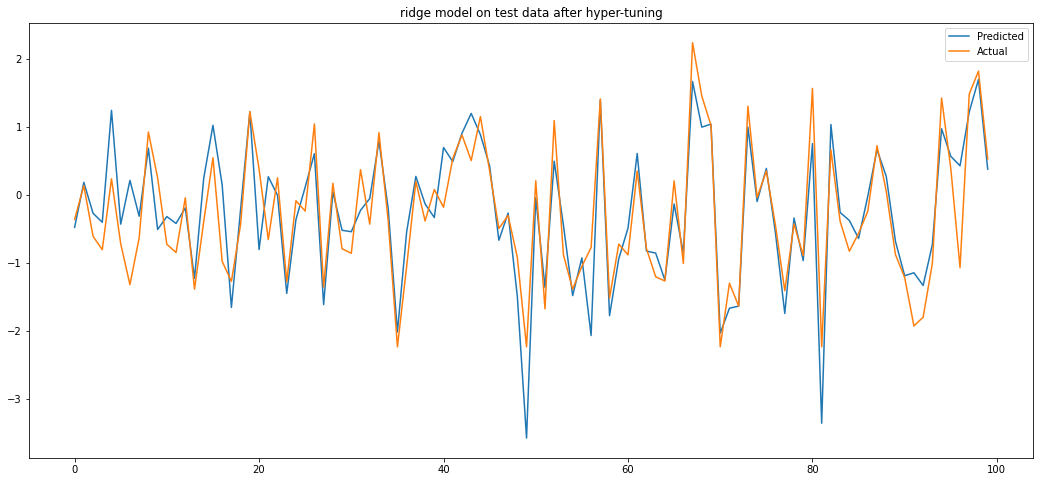

In [117]:
#Plot the figure
plt.figure(figsize=(18,8))
plt.plot((y_pred_ridge[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("ridge model on test data after hyper-tuning")
plt.show()

In [118]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression after tuning',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
testing_df=testing_df.append(dict2,ignore_index=True)
     

## Which hyperparameter optimization technique have you used and why?


GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

We have tuned Ridge regression using hyperparametric technique & check the performance of the model and we have found that there is no significant difference in between tuned and without tuned.

It performs well only when there is multicolinearity or overfitting situation is present in our case we have already handle the multicolinearity situation, thats why it is not showing any difference in performance.

# Model-4 Elastic Net Regression

Elastic Net regression is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties to overcome some of the limitations of each individual method.

The model introduces two hyperparameters, alpha and l1_ratio, which control the strength of the L1 and L2 penalties, respectively. Elastic Net regression is particularly useful when dealing with datasets that have high dimensionality and multicollinearity between features.

In [119]:

#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [120]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [121]:
y_pred_train_elasticnet=elasticnet.predict(X_train)
y_pred_test_elasticnet=elasticnet.predict(X_test)

In [122]:
#for the training set
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_elasticnet))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train,y_pred_train_elasticnet)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_elasticnet)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_elasticnet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_e)

MSE : 0.5369840687392574
RMSE : 0.7327919682551505
MAE : 0.5619205940871196
R2 : 0.45747390206445204
Adjusted R2 : 0.4437519305007427


We can see that our model has poorly performed, maintainubg the r2 score of 0.45.

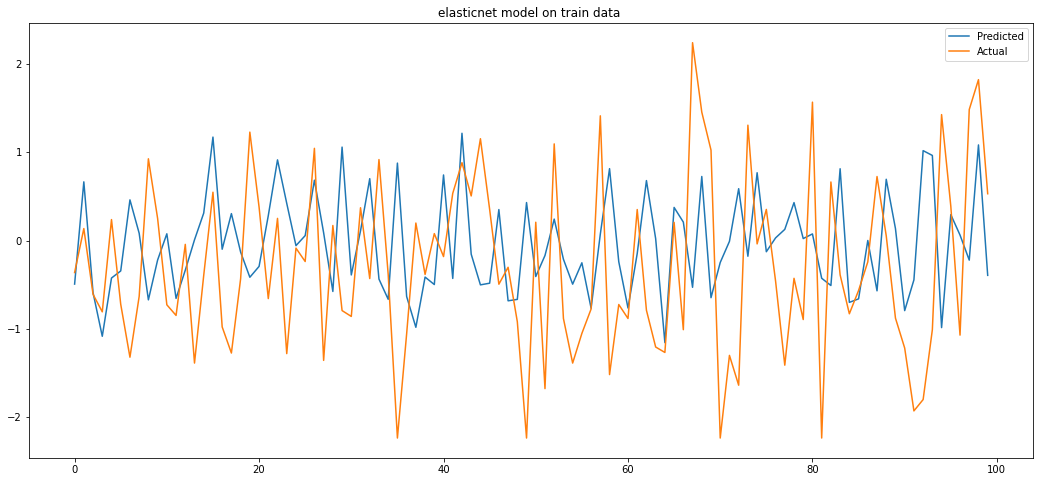

In [123]:
#Plot the figure
plt.figure(figsize=(18,8))
plt.plot((y_pred_train_elasticnet[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("elasticnet model on train data ")
plt.show()

In [124]:
dict1={"Model":"elasticnet regression",
       "MSE" :round((0.5369840687392574),2),
        "RMSE" :round((0.7327919682551505),2),
        "MAE"  :round((0.5619205940871196),2),
       "R2_score" :round((0.45747390206445204),2),
       "Adjusted R2"  :round((0.4437519305007427),2)
       
       }
training_df=training_df.append(dict1,ignore_index=True)       

In [125]:
training_df.drop(index=4,axis=0,inplace=True)

In [126]:
#for the test set
#calculate MSE
MSE_e= mean_squared_error((y_test), (y_pred_test_elasticnet))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test,y_pred_test_elasticnet)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_test, y_pred_test_elasticnet)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_test, y_pred_test_elasticnet))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_e)

MSE : 0.5782818338542425
RMSE : 0.7604484426009711
MAE : 0.5812100043991749
R2 : 0.43847864900060607
Adjusted R2 : 0.4242762354390289


It is giving poor results on test data too, performing hypertuning and cross validation to improve the performance.

In [127]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
testing_df=testing_df.append(dict2,ignore_index=True)


# Hypertuning and cross validation

In [128]:
elasticnet= ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100],"l1_ratio":[0.1,0.2,0.3,0.4,0.5,1,1.5]}
elasticnetRegressor = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
elasticnetRegressor.fit(X_train,y_train)
     

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5]},
             scoring='neg_mean_squared_error')

In [129]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,elasticnetRegressor.best_params_)
print("\nUsing ",elasticnetRegressor.best_params_, " the negative mean squared error is: ",elasticnetRegressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.188555745528592


let"s use this values on our model and see if our model performance has been improved or not.

In [130]:
elasticnet = ElasticNet(alpha=0.0001, l1_ratio=0.3)

In [131]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.0001, l1_ratio=0.3)

In [132]:
y_pred_test_elasticnet2=elasticnet.predict(X_test)

In [133]:
#calculate MSE
MSE_e= mean_squared_error((y_test), (y_pred_test_elasticnet2))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test,y_pred_test_elasticnet2)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_test, y_pred_test_elasticnet2)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_test, y_pred_test_elasticnet2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_e)

MSE : 0.18749682370538912
RMSE : 0.4330090342075891
MAE : 0.33038054206611445
R2 : 0.8179374422789109
Adjusted R2 : 0.8133325813342088


Yes, our r2_score has come up to be 0.81 .It means that it can predict very clearly over the variance.

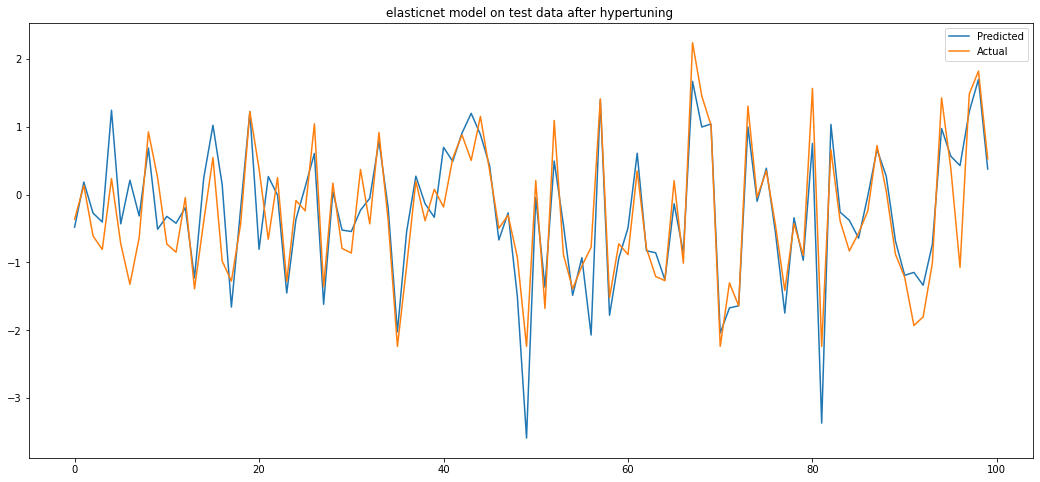

In [134]:
#Plot the figure
plt.figure(figsize=(18,8))
plt.plot((y_pred_test_elasticnet2[:100]))
plt.plot((np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.title("elasticnet model on test data after hypertuning ")
plt.show()

# Model-5 Decision Tree

Decision tree is a decision support hierarchical model that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements

In [135]:
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [136]:
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [137]:
#using it on training data
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d)
     

Model Score: 0.6985533052111057
MSE : 0.2983673472883732
RMSE : 0.5462301230144427
MAE : 0.4040202594099049
R2 : 0.6985533052111057
Adjusted R2 : 0.6909288923218315


In [138]:
# storing the train set metrics value in a dataframe for later comparison
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
     

In [139]:

#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )


MSE : 0.36583288010049697
RMSE : 0.6048412023833173
MAE : 0.44498005402817165
R2 : 0.6447701431240052
Adjusted R2 : 0.6357854066971651


In [140]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
testing_df=testing_df.append(dict1,ignore_index=True)
     

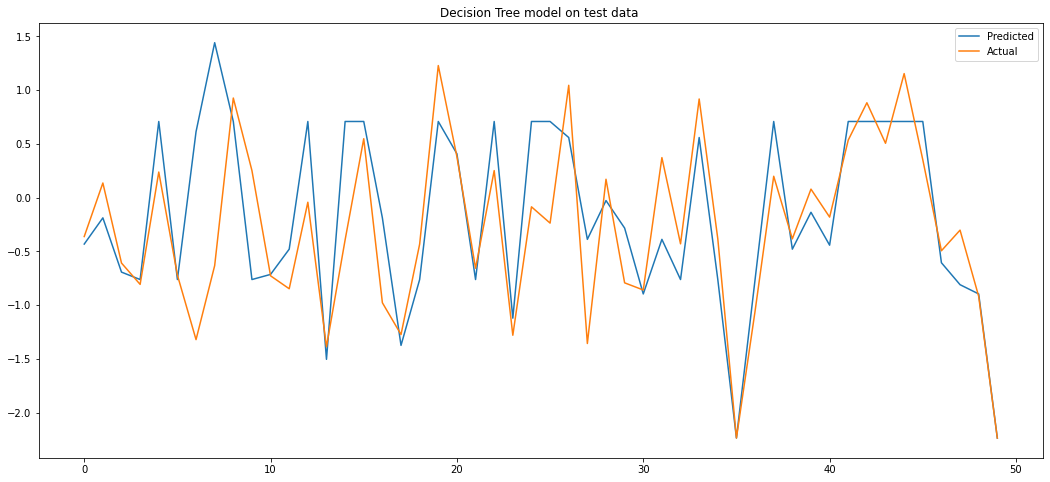

In [141]:
plt.figure(figsize=(18,8))
plt.plot((y_pred_test_d[:50]))
plt.plot((np.array(y_test[:50])))
plt.legend(["Predicted","Actual"])
plt.title("Decision Tree model on test data ")
plt.show()

# HyperParameter tuning and Cross validation

In [142]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_
     

In [143]:
dt_best_params

{'max_depth': 16, 'min_samples_leaf': 22, 'min_samples_split': 49}

In [144]:
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [145]:

# fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=22, min_samples_split=49,
                      random_state=1)

In [146]:

# dt test predictions
y_pred_dt = dt_model.predict(X_test)

In [147]:
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_dt)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_dt)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_dt))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_d )


MSE : 0.1820473488356487
RMSE : 0.4266700702365338
MAE : 0.29488458330553236
R2 : 0.823228973694828
Adjusted R2 : 0.8187579500786784


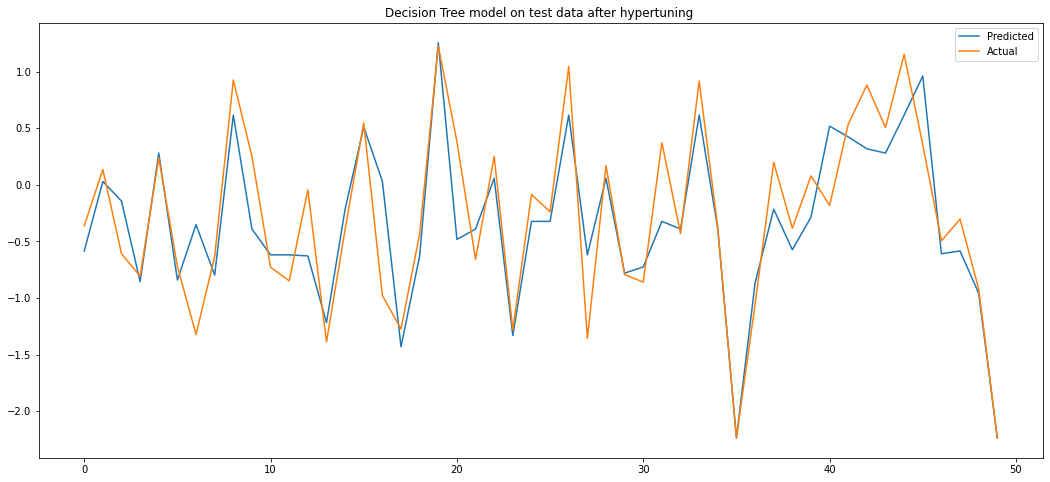

In [148]:
plt.figure(figsize=(18,8))
plt.plot((y_pred_dt[:50]))
plt.plot((np.array(y_test[:50])))
plt.legend(["Predicted","Actual"])
plt.title("Decision Tree model on test data after hypertuning ")
plt.show()

# Model -6 Random Forest

In [149]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [150]:
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

     



print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9873261137459131
MSE : 0.012544419583418199
RMSE : 0.11200187312459645
MAE : 0.07462958969098607
R2 : 0.9873261137459131
Adjusted R2 : 0.9870055564355052


Our r2 is 0.98. It means it is able to capture most of the data.

In [151]:
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)
     

In [152]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
     


MSE : 0.09767789623487405
RMSE : 0.3125346320567915
MAE : 0.20466392962814214
R2 : 0.9051531259575937
Adjusted R2 : 0.9027541886281839


In [153]:
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
testing_df=testing_df.append(dict2,ignore_index=True)

We can see that now r2 is 0.90, it means it is performing good on training data but not on test data.
Having the case of overfitting.

In [154]:
rf_model.feature_importances_

array([3.10295164e-01, 1.50980644e-01, 1.21938221e-02, 1.30379089e-02,
       3.43545052e-02, 4.34536038e-02, 1.46781964e-03, 2.75180245e-03,
       1.83789913e-01, 1.80092822e-02, 4.14129361e-03, 1.33516969e-03,
       1.61131264e-03, 3.77217361e-03, 4.32033772e-03, 1.48602235e-03,
       1.11759663e-03, 1.27885545e-03, 2.62246381e-03, 5.36799200e-03,
       1.33388900e-02, 2.10297441e-02, 3.04821456e-02, 2.69168262e-02,
       9.56657241e-03, 2.91574018e-03, 9.12945282e-03, 6.36982765e-04,
       2.01480592e-03, 9.52222203e-04, 1.78881849e-04, 1.53274184e-04,
       2.69283544e-04, 1.03973970e-03, 2.65653243e-03, 7.29379580e-03,
       2.06362243e-02, 1.13021735e-02, 7.98811588e-03, 8.66916305e-03,
       6.88765817e-03, 2.98408392e-03, 1.30739907e-03, 9.01510968e-04,
       2.28701539e-03, 1.54873903e-03, 1.49015145e-03, 1.24634397e-03,
       8.89503946e-04, 1.69163559e-03, 1.60129138e-03, 1.22338000e-03,
       8.03832116e-04, 5.79204939e-04])

In [155]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
     

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
     

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
0       Temperature                0.31
8   Functioning Day                0.18
1          Humidity                0.15
5          Rainfall                0.04
22                4                0.03
4         Radiation                0.03
23                5                0.03
21                3                0.02
9            Autumn                0.02
36               18                0.02
19                1                0.01
40               22                0.01
39               21                0.01
26                8                0.01
24                6                0.01
38               20                0.01
37               19                0.01
20                2                0.01
35               17                0.01
3        Visibility                0.01
2        Wind speed                0.01
42                1                0.00
34               16                0.00
44                3                0.00
45                4                0.00
46                5                0.00
47                6                0.00
41               23                0.00
48                7                0.00
49                8                0.00
50                9                0.00
51               10                0.00
52               11                0.00
43                2                0.00
27                9                0.00
33               15                0.00
15         Thursday                0.00
6          Snowfall                0.00
7           Holiday                0.00
10           Spring                0.00
11           Friday                0.00
12           Monday                0.00
13         Saturday                0.00
14           Sunday                0.00
16          Tuesday                0.00
32               14                0.00
17        Wednesday                0.00
18                0                0.00
25                7                0.00
28               10                0.00
29               11                0.00
30               12                0.00
31               13                0.00
53               12                0.00

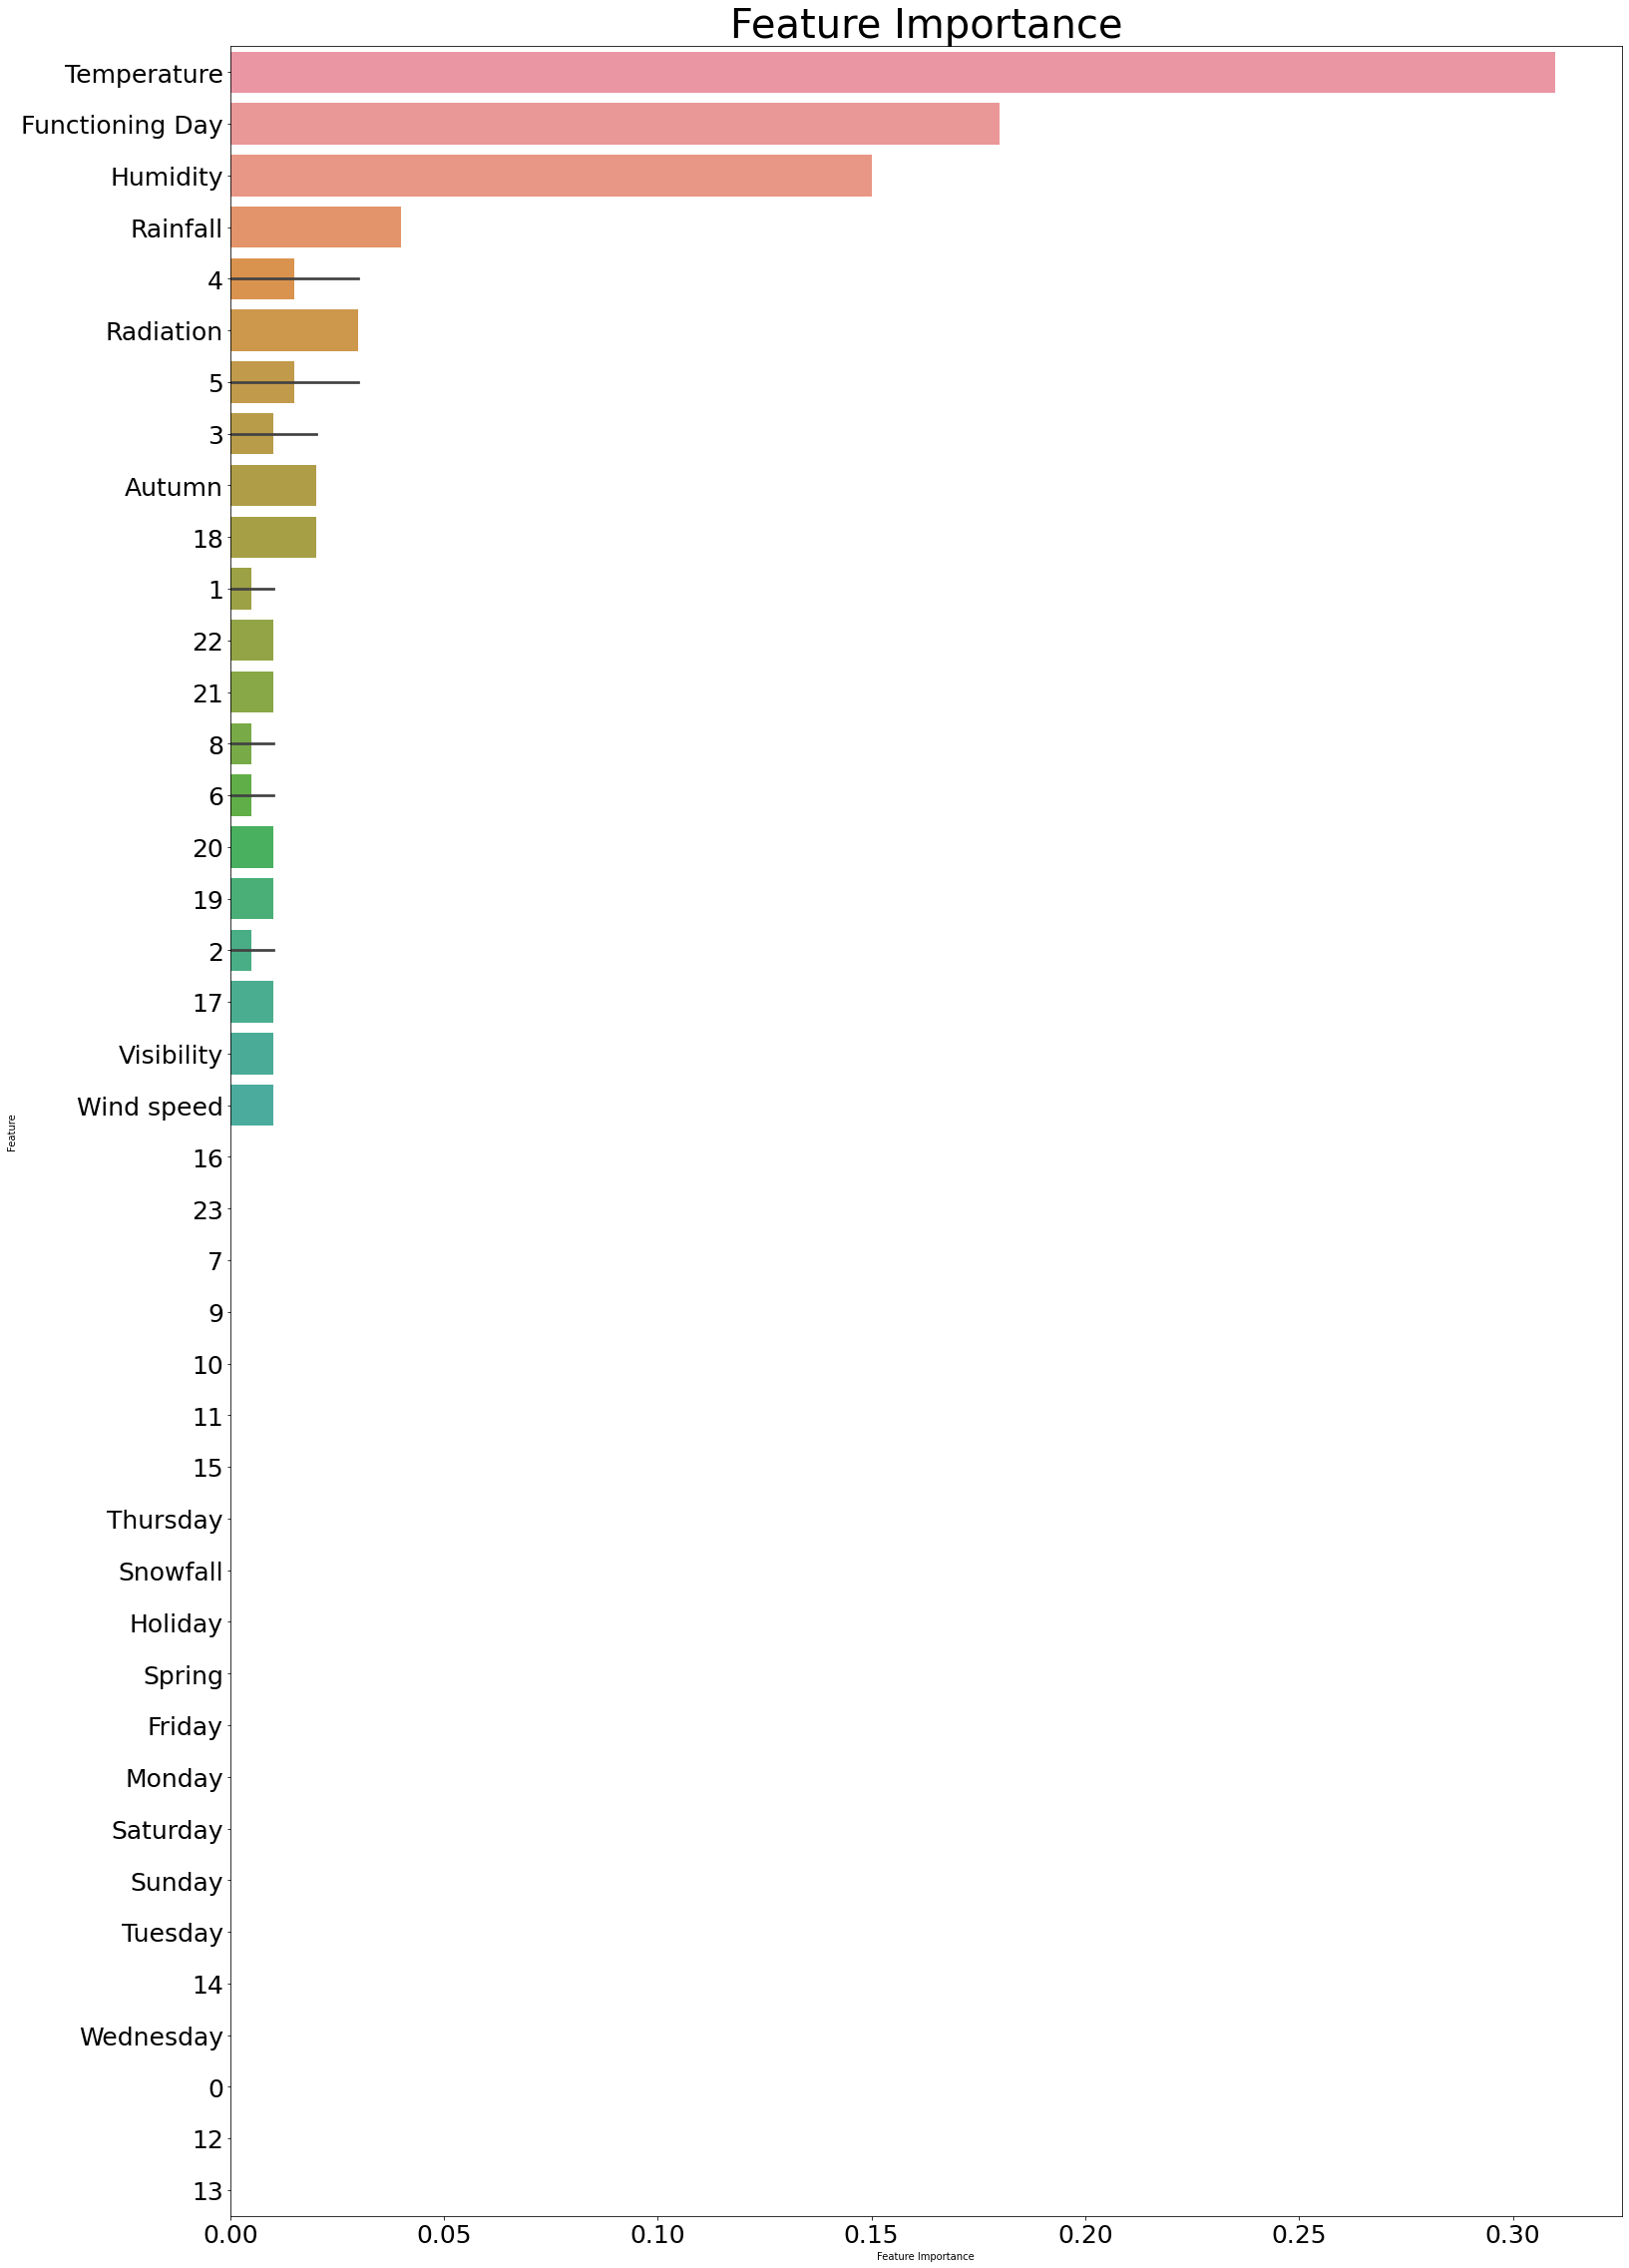

In [156]:
plt.figure(figsize=(25,40))
sns.barplot(data=importance_df,x='Feature Importance',y='Feature')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Feature Importance',fontsize=40)
plt.show()

# Model-7 Gradient Boosting

In [157]:
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [158]:
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [159]:

print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)



#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb)


Model Score: 0.8775254131487222
MSE : 0.12122348070409651
RMSE : 0.34817162535751894
MAE : 0.26453053321387593
R2 : 0.8775254131487222
Adjusted R2 : 0.8744276952611489


Looks like our train set's r2 score value is 0.87 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [160]:
# storing the t set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [161]:

#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb)

MSE : 0.14123920233751436
RMSE : 0.3758180441882938
MAE : 0.28363548217450596
R2 : 0.8628543677707368
Adjusted R2 : 0.8593855789462027


In [162]:
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
testing_df=testing_df.append(dict2,ignore_index=True)

we have r2 of 0.86.it means it is performing well.

In [163]:
gb_model.feature_importances_

array([3.26973636e-01, 1.22813611e-01, 5.20641506e-04, 1.92395137e-03,
       4.97929230e-02, 7.18331678e-02, 1.89947762e-04, 3.10905805e-03,
       2.21470051e-01, 2.16651440e-02, 5.67379022e-05, 1.70663000e-04,
       4.18362074e-05, 2.12111934e-03, 3.44214841e-03, 1.91480826e-05,
       1.46439950e-04, 0.00000000e+00, 0.00000000e+00, 3.83795591e-04,
       6.22368956e-03, 1.68034386e-02, 2.68985625e-02, 2.51235472e-02,
       5.97686259e-03, 1.55291077e-04, 8.31527239e-03, 0.00000000e+00,
       2.33182725e-03, 1.23161422e-03, 0.00000000e+00, 0.00000000e+00,
       2.17847267e-05, 0.00000000e+00, 7.13292226e-05, 5.59626550e-03,
       2.30025994e-02, 1.34597679e-02, 9.13466478e-03, 1.35823396e-02,
       1.10024474e-02, 2.99901859e-04, 7.98642631e-04, 0.00000000e+00,
       2.43693467e-04, 0.00000000e+00, 8.68744467e-04, 1.69395593e-03,
       0.00000000e+00, 2.87107289e-04, 0.00000000e+00, 1.25571265e-04,
       3.84137168e-07, 7.66750855e-05])

# Feature storing

In [164]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
     

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
     

importance_df.sort_values(by=["Feature Importance"],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
0       Temperature                0.33
8   Functioning Day                0.22
1          Humidity                0.12
5          Rainfall                0.07
4         Radiation                0.05
22                4                0.03
23                5                0.03
21                3                0.02
9            Autumn                0.02
36               18                0.02
40               22                0.01
26                8                0.01
38               20                0.01
24                6                0.01
37               19                0.01
35               17                0.01
20                2                0.01
39               21                0.01
42                1                0.00
41               23                0.00
33               15                0.00
43                2                0.00
44                3                0.00
45                4                0.00
46                5                0.00
47                6                0.00
48                7                0.00
49                8                0.00
50                9                0.00
51               10                0.00
52               11                0.00
34               16                0.00
27                9                0.00
32               14                0.00
14           Sunday                0.00
2        Wind speed                0.00
3        Visibility                0.00
6          Snowfall                0.00
7           Holiday                0.00
10           Spring                0.00
11           Friday                0.00
12           Monday                0.00
13         Saturday                0.00
15         Thursday                0.00
31               13                0.00
16          Tuesday                0.00
17        Wednesday                0.00
18                0                0.00
19                1                0.00
25                7                0.00
28               10                0.00
29               11                0.00
30               12                0.00
53               12                0.00

We have seen how temperature,Functioning day, humidity  are all highly important.

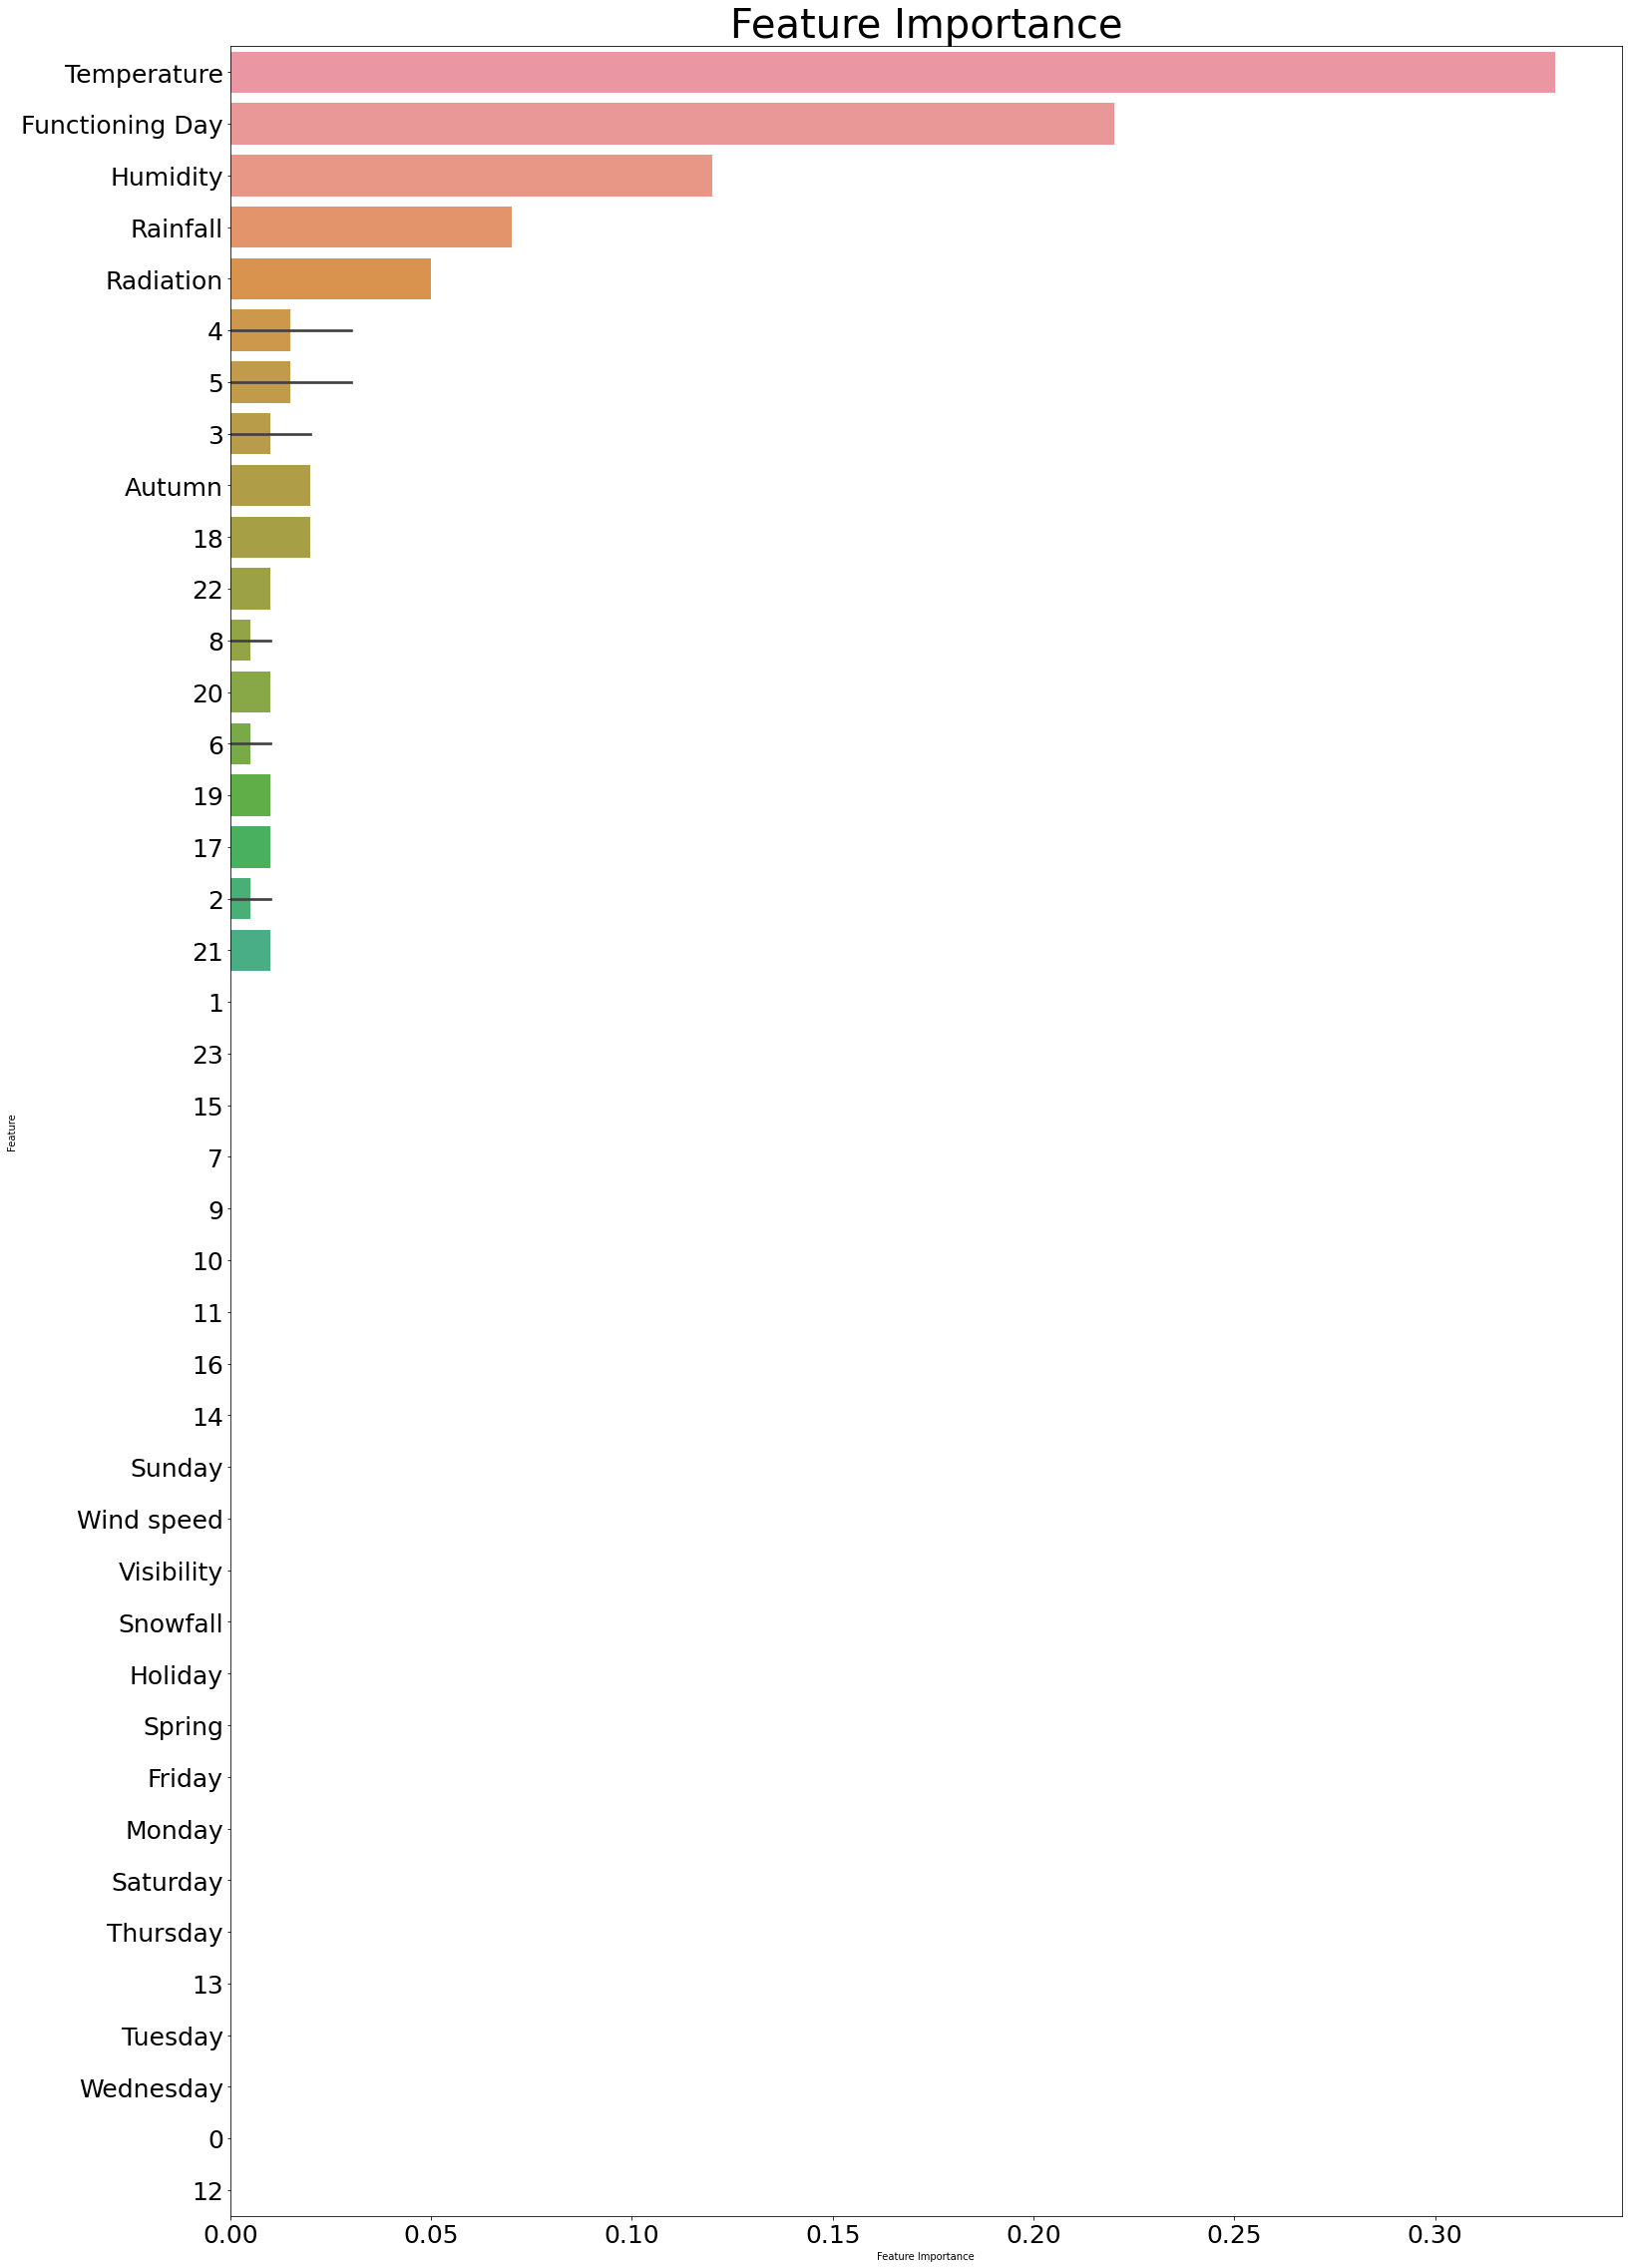

In [165]:
plt.figure(figsize=(25,40))
sns.barplot(data=importance_df,x='Feature Importance',y='Feature')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Feature Importance',fontsize=40)
plt.show()

# Hyperparameter tuning

In [166]:
#trees required
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [167]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [168]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [169]:

gb_optimal_model=gb_grid.best_estimator_

In [170]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [171]:
y_pred_train_g_g = gb_grid.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [172]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gbh)


Model Score: 0.9302023723541358
MSE : 0.069084628784211
RMSE : 0.2628395495054178
MAE : 0.19220668970212582
R2 : 0.9302023723541358
Adjusted R2 : 0.928436999102203


In [173]:
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [174]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gbh)

MSE : 0.10187123914973917
RMSE : 0.3191727418651837
MAE : 0.22904780500146393
R2 : 0.9010813197189901
Adjusted R2 : 0.8985793952528662


Hyperparameter tunning certainly showed a better result, r2 was 0.90 on test and mae and rmse was lowered. 

In [175]:
dict2={'Model':'Gradient Boosting gridsearchcv after hypertuning ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
testing_df=testing_df.append(dict2,ignore_index=True)

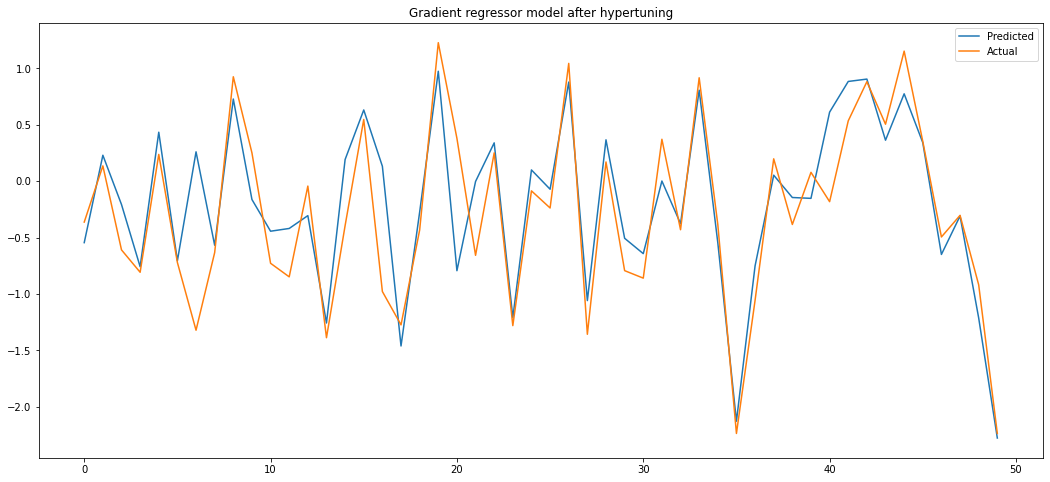

In [176]:
plt.figure(figsize=(18,8))
plt.plot((y_pred_g_g[:50]))
plt.plot((np.array(y_test[:50])))
plt.legend(["Predicted","Actual"])
plt.title("Gradient regressor model after hypertuning")
plt.show()

In [177]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_test.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
     

importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
     

importance_df.sort_values(by=["Feature Importance"],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
0       Temperature                0.31
8   Functioning Day                0.20
1          Humidity                0.15
5          Rainfall                0.06
22                4                0.03
4         Radiation                0.03
23                5                0.03
21                3                0.02
9            Autumn                0.02
36               18                0.02
40               22                0.01
26                8                0.01
38               20                0.01
24                6                0.01
37               19                0.01
35               17                0.01
20                2                0.01
39               21                0.01
42                1                0.00
41               23                0.00
33               15                0.00
43                2                0.00
44                3                0.00
45                4                0.00
46                5                0.00
47                6                0.00
48                7                0.00
49                8                0.00
50                9                0.00
51               10                0.00
52               11                0.00
34               16                0.00
27                9                0.00
32               14                0.00
14           Sunday                0.00
2        Wind speed                0.00
3        Visibility                0.00
6          Snowfall                0.00
7           Holiday                0.00
10           Spring                0.00
11           Friday                0.00
12           Monday                0.00
13         Saturday                0.00
15         Thursday                0.00
31               13                0.00
16          Tuesday                0.00
17        Wednesday                0.00
18                0                0.00
19                1                0.00
25                7                0.00
28               10                0.00
29               11                0.00
30               12                0.00
53               12                0.00

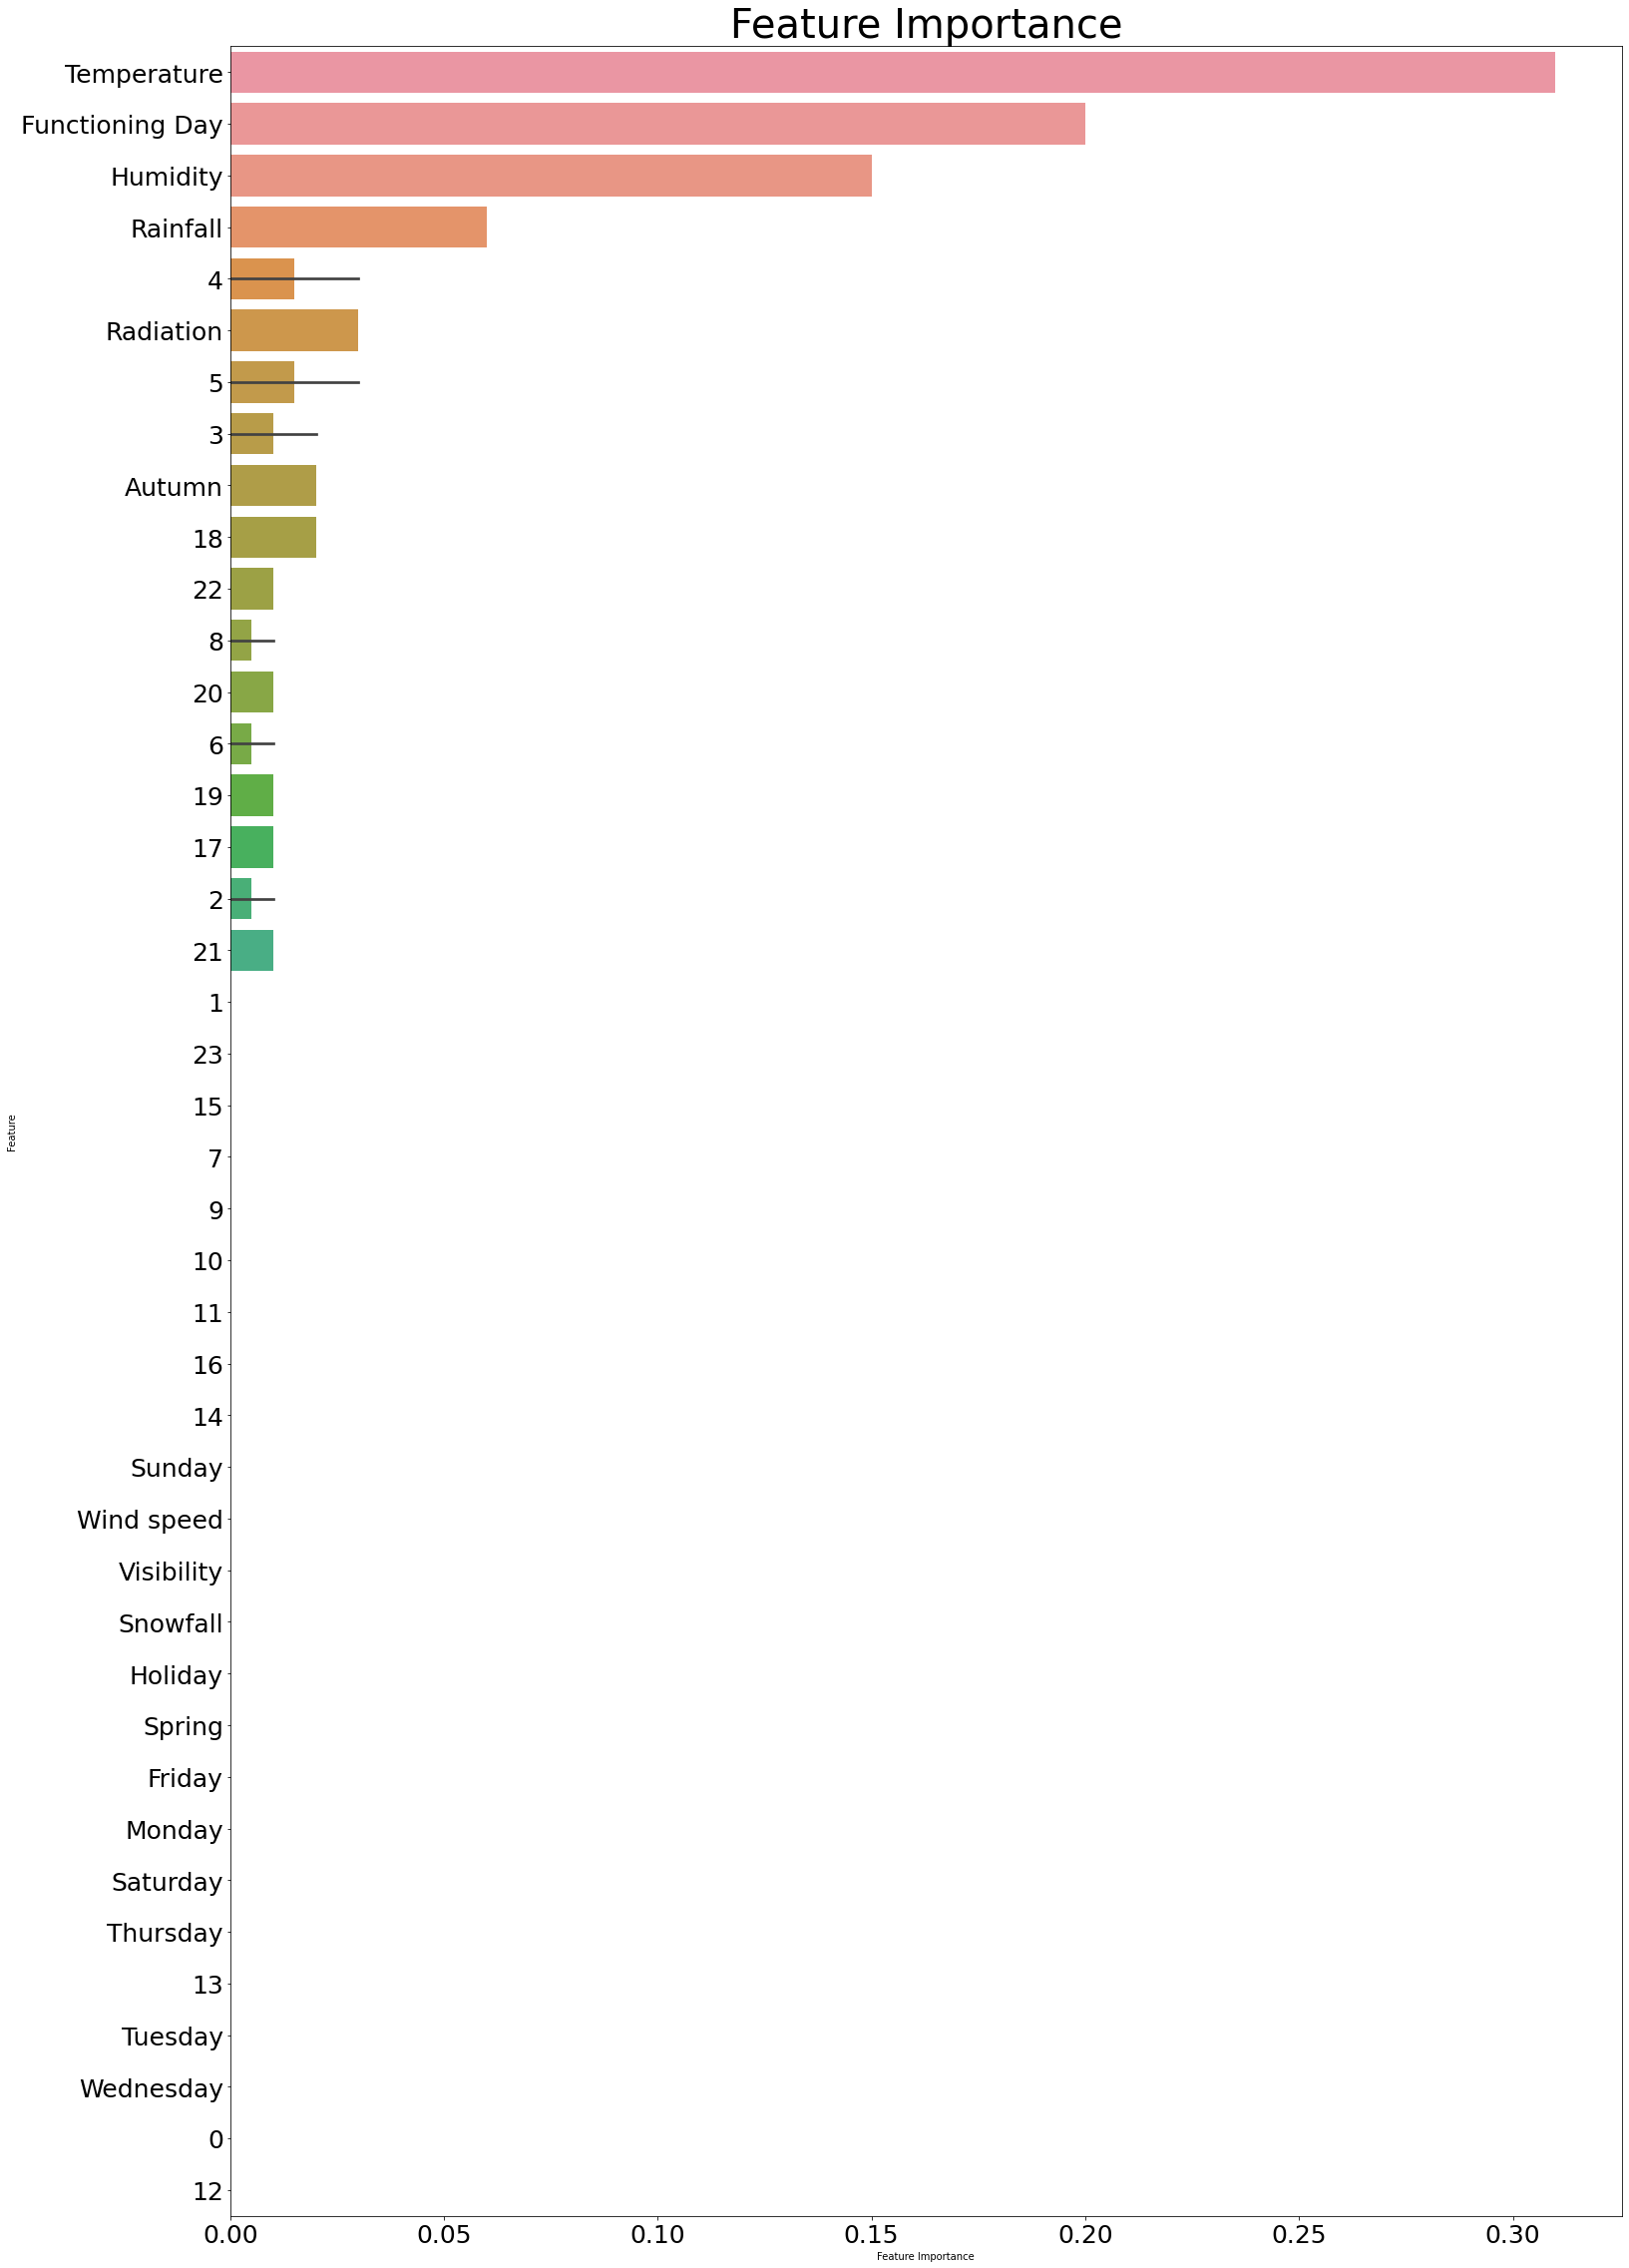

In [178]:
plt.figure(figsize=(25,40))
x=sns.barplot(data=importance_df,x='Feature Importance',y='Feature')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Feature Importance',fontsize=40)
plt.show()

# Concatenating all models

In [179]:
result=pd.concat([training_df,testing_df],keys=["training set","testing set"])
result.style.bar(subset=['R2_score'])


# Conclusion


During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables. Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Ridge, Elastic Net, Decision Tree, Random Forest and Gradient Booster. We also performed hyperparameter tuning to enhance the performance of our models.

Gradient Boosting gridsearchcv model shows promising result with R2 score of 0.90, therefore it can be used to solve this problem.



Temperatue, Functioning_Day_Yes, Humidity, Rainfall and Solar radiation are major driving factors for the Bike rent demand.




Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
People prefer to rent bike more in summer than in winter.




Bike demand is more on clear days than on snowy or rainy days.




Temperature range from 22 to 25(°C) has more demand for bike.




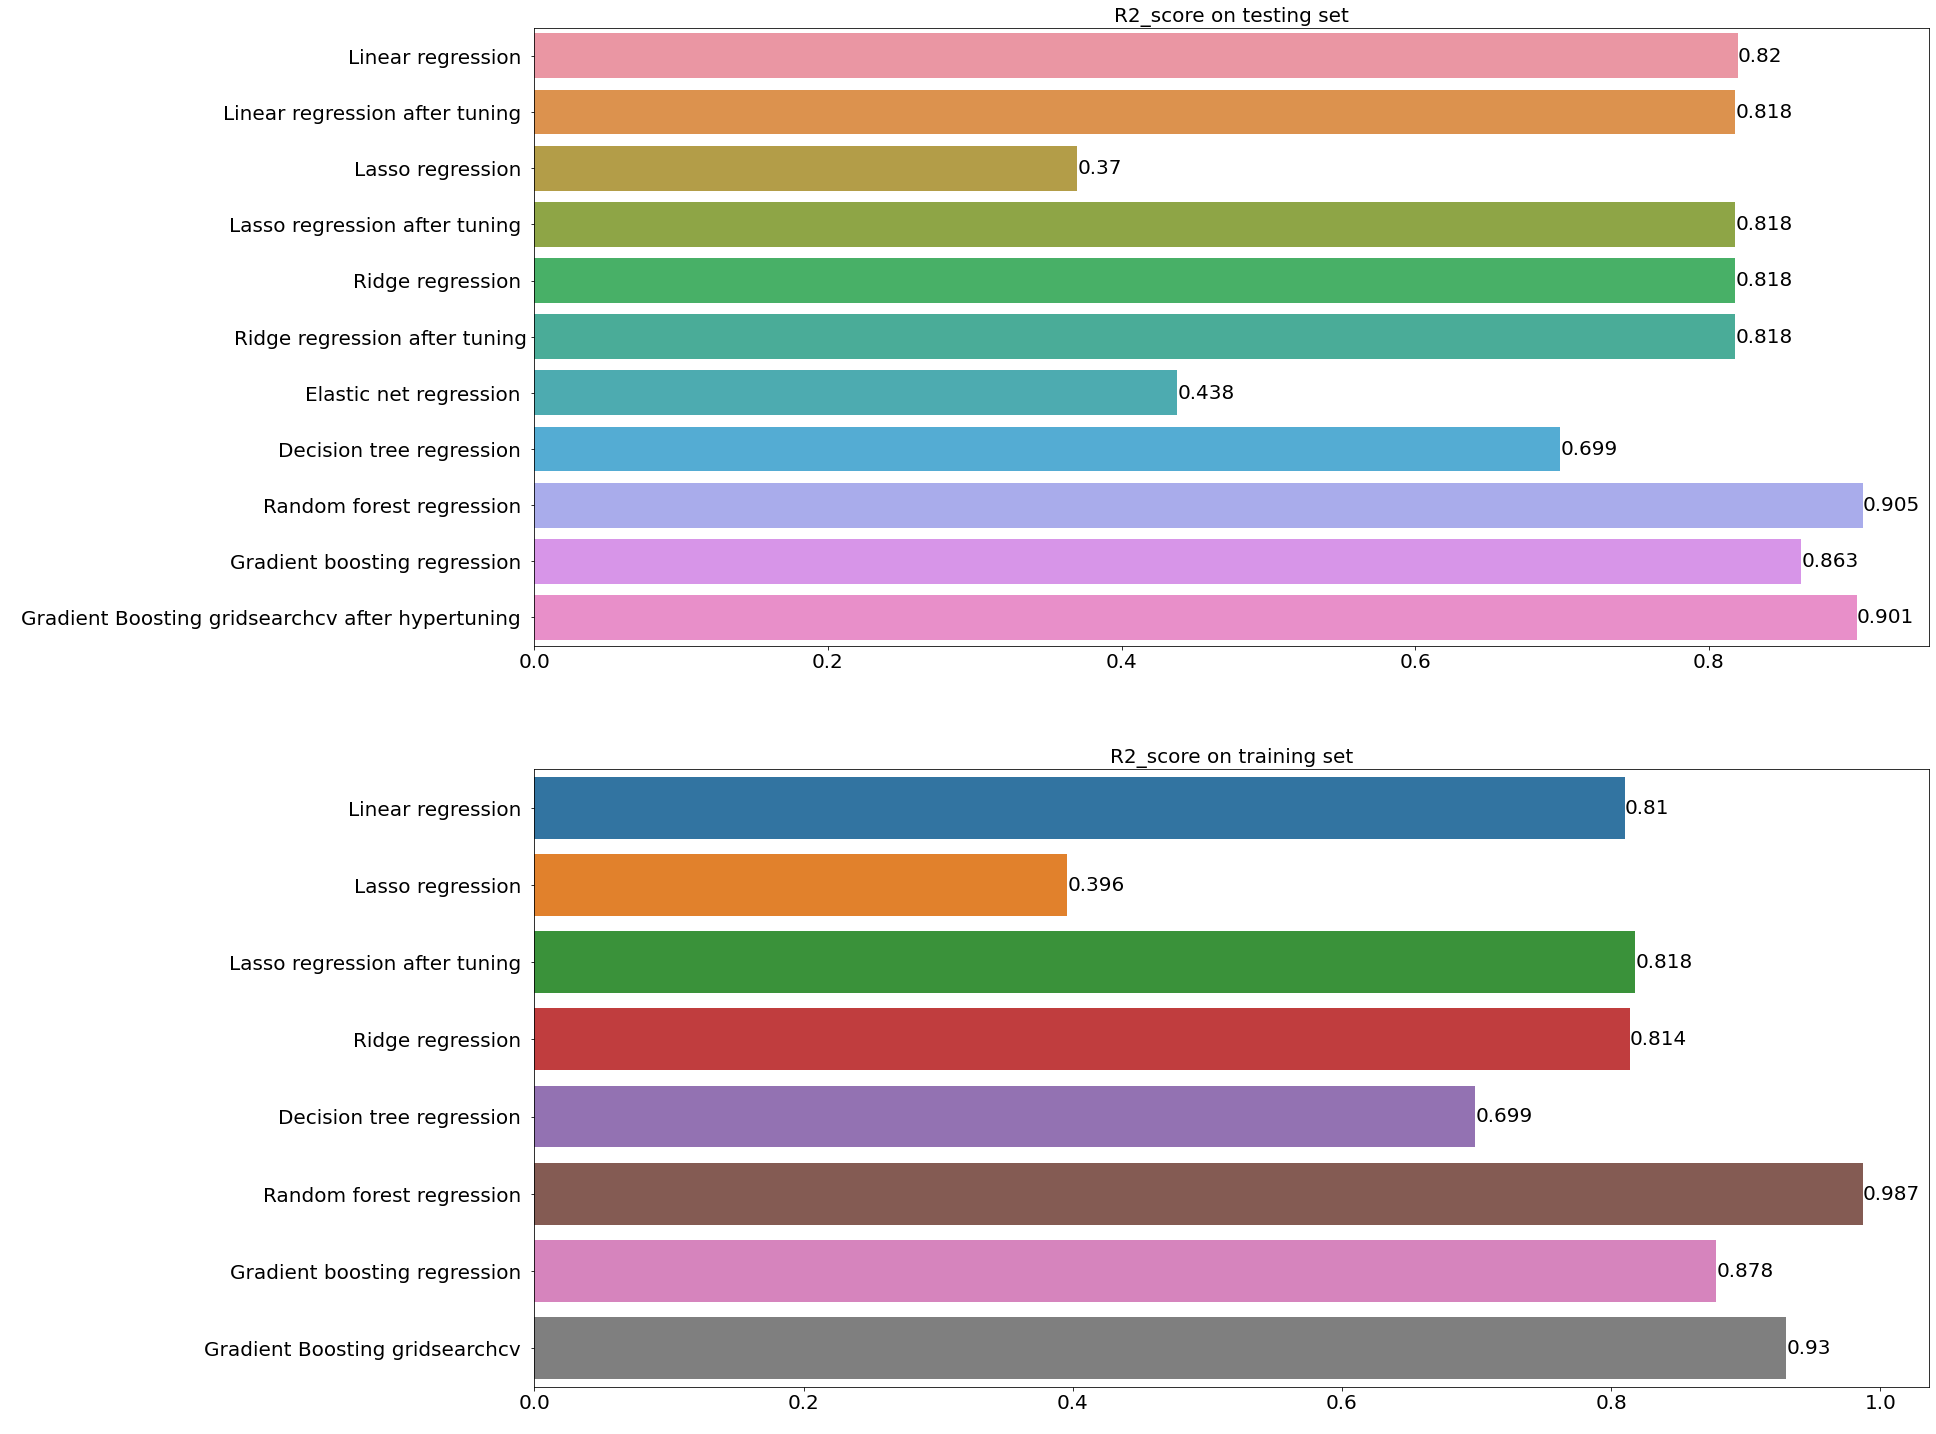

<Figure size 432x288 with 0 Axes>

In [180]:
plt.figure(figsize=(25,25))

plt.subplot(211)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('R2_score on testing set',fontsize=20)
c=sns.barplot(data=testing_df,x="R2_score",y='Model')
for container in c.containers:
    c.bar_label(container,fontsize=20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.subplot(212)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('R2_score on training set',fontsize=20)
d=sns.barplot(data=training_df,x="R2_score",y='Model')
for container in d.containers:
    d.bar_label(container,fontsize=20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()
plt.tight_layout()

# Saving the best model and deployment

In [181]:
# Import pickle
import pickle

# Save the best model (GB)
pickle.dump(gb_optimal_model, open('gb_optimal_model.pkl', 'wb'))
     

Overall, the project highlights the potential of machine learning in solving real-world problems and provides a roadmap for future research in this area. The findings of this project can be extended to other cities with similar bike sharing systems, leading to more effective and efficient bike sharing operations, and better outcomes for all stakeholders.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***